In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Exploratory Data Analysis

- import necessary libraries 
- import the data and create a dataframe (Loading the Dataset)
- Data Understanding (Checking the null values, duplicate data type ,remaining columns  )
- Data Reduction (Remove unnecessary columns from the Dataset )
- Feature Engineering (Creating New Columns , manipulating existing columns , etc)
- Data Wrangling/Data Cleaning (Cleaning Row level Data)
- EDA
    - Univariate Analysis
    - Bivariate Analysis
    - Multivariate Analysis


In [4]:
df=pd.read_csv("C:\\Users\\Yash\\Downloads\\used_cars_data.csv")
df.head(2)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50


In [6]:
#Check Data Types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [8]:
# Getting the percentage of missing values in each column
round(df.isnull().sum()/len(df)*100,2)

S.No.                 0.00
Name                  0.00
Location              0.00
Year                  0.00
Kilometers_Driven     0.00
Fuel_Type             0.00
Transmission          0.00
Owner_Type            0.00
Mileage               0.03
Engine                0.63
Power                 0.63
Seats                 0.73
New_Price            86.13
Price                17.01
dtype: float64

In [10]:
# Checking Duplicates
df.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

Data Reduction

In [13]:
# Dropping the columns that are not required
df.drop(columns=["S.No.","New_Price"],inplace=True)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN


In [15]:
# Dropping some rows with missing values or null values
df.dropna(subset=["Mileage","Engine","Power","Seats","Price"],inplace=True)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [17]:
# Used to reset the index after dropping rows
df.reset_index(drop=True,inplace=True)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
5970,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
5971,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
5972,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
5973,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [19]:
# FEATURE ENGINEERING
df["Brand"]=df.Name.str.split().str.get(0)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi


In [21]:
df["Engine"]=df.Engine.str.split().str.get(0)
df["Power"]=df.Power.str.split().str.get(0)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998,58.16,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582,126.2,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199,88.7,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248,88.76,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968,140.8,5.0,17.74,Audi


In [23]:
# Convert Engine and Power to numeric values
df["Engine"]=pd.to_numeric(df["Engine"])
df["Power"]=pd.to_numeric(df["Power"], errors='coerce')
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998,58.16,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582,126.20,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199,88.70,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248,88.76,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968,140.80,5.0,17.74,Audi


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   int64  
 9   Power              5872 non-null   float64
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
 12  Brand              5975 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 607.0+ KB


In [27]:
def kmkg_tokmpl(mileage):
    if "km/kg" in mileage:
        value=float(mileage.replace(" km/kg",""))
        return value * 0.75
    elif "kmpl" in mileage:
        value=float(mileage.replace(" kmpl",""))
        return value
    else:
        return np.nan

In [29]:
df["Mileage"]=df["Mileage"].apply(lambda x:kmkg_tokmpl(str(x)))
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,19.95,998,58.16,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5970,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248,74.00,5.0,4.75,Maruti
5971,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120,71.00,5.0,4.00,Hyundai
5972,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498,112.00,8.0,2.90,Mahindra
5973,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998,67.10,5.0,2.65,Maruti


In [31]:
df["Seats"]=df["Seats"].astype(int)
df["Seats"]=df["Seats"].astype(str)
# df.info()
df.nunique()

Name                 1855
Location               11
Year                   22
Kilometers_Driven    3080
Fuel_Type               4
Transmission            2
Owner_Type              4
Mileage               440
Engine                145
Power                 368
Seats                   9
Price                1369
Brand                  31
dtype: int64

In [33]:
from datetime import date
df["Car_Age"]=date.today().year - df["Year"]
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,19.95,998,58.16,5,1.75,Maruti,15
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5,12.50,Hyundai,10
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5,4.50,Honda,14
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.00,Maruti,13
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,17.74,Audi,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5970,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248,74.00,5,4.75,Maruti,11
5971,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120,71.00,5,4.00,Hyundai,10
5972,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498,112.00,8,2.90,Mahindra,13
5973,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998,67.10,5,2.65,Maruti,12


In [35]:
df.drop(columns=["Name","Year"],inplace=True)

In [37]:
df

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Car_Age
0,Mumbai,72000,CNG,Manual,First,19.95,998,58.16,5,1.75,Maruti,15
1,Pune,41000,Diesel,Manual,First,19.67,1582,126.20,5,12.50,Hyundai,10
2,Chennai,46000,Petrol,Manual,First,18.20,1199,88.70,5,4.50,Honda,14
3,Chennai,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.00,Maruti,13
4,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,17.74,Audi,12
...,...,...,...,...,...,...,...,...,...,...,...,...
5970,Delhi,27365,Diesel,Manual,First,28.40,1248,74.00,5,4.75,Maruti,11
5971,Jaipur,100000,Diesel,Manual,First,24.40,1120,71.00,5,4.00,Hyundai,10
5972,Jaipur,55000,Diesel,Manual,Second,14.00,2498,112.00,8,2.90,Mahindra,13
5973,Kolkata,46000,Petrol,Manual,First,18.90,998,67.10,5,2.65,Maruti,12


# Data Wrangling

In [40]:
df["Location"].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [42]:
df["Brand"].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [44]:
df["Fuel_Type"].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG'], dtype=object)

In [46]:
df["Transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [48]:
df["Owner_Type"].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [50]:
df["Seats"].unique()

array(['5', '7', '8', '4', '6', '2', '10', '9', '0'], dtype=object)

In [52]:
df["Brand"].replace({"Land":"Land Rover","Mini":"Mini Cooper","ISUZU":"Isuzu"},inplace=True)
df

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Car_Age
0,Mumbai,72000,CNG,Manual,First,19.95,998,58.16,5,1.75,Maruti,15
1,Pune,41000,Diesel,Manual,First,19.67,1582,126.20,5,12.50,Hyundai,10
2,Chennai,46000,Petrol,Manual,First,18.20,1199,88.70,5,4.50,Honda,14
3,Chennai,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.00,Maruti,13
4,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,17.74,Audi,12
...,...,...,...,...,...,...,...,...,...,...,...,...
5970,Delhi,27365,Diesel,Manual,First,28.40,1248,74.00,5,4.75,Maruti,11
5971,Jaipur,100000,Diesel,Manual,First,24.40,1120,71.00,5,4.00,Hyundai,10
5972,Jaipur,55000,Diesel,Manual,Second,14.00,2498,112.00,8,2.90,Mahindra,13
5973,Kolkata,46000,Petrol,Manual,First,18.90,998,67.10,5,2.65,Maruti,12


In [54]:
print(df[df["Seats"]!="0"])


        Location  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0         Mumbai              72000       CNG       Manual      First   
1           Pune              41000    Diesel       Manual      First   
2        Chennai              46000    Petrol       Manual      First   
3        Chennai              87000    Diesel       Manual      First   
4     Coimbatore              40670    Diesel    Automatic     Second   
...          ...                ...       ...          ...        ...   
5970       Delhi              27365    Diesel       Manual      First   
5971      Jaipur             100000    Diesel       Manual      First   
5972      Jaipur              55000    Diesel       Manual     Second   
5973     Kolkata              46000    Petrol       Manual      First   
5974   Hyderabad              47000    Diesel       Manual      First   

      Mileage  Engine   Power Seats  Price      Brand  Car_Age  
0       19.95     998   58.16     5   1.75     Maruti     

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5975 non-null   object 
 1   Kilometers_Driven  5975 non-null   int64  
 2   Fuel_Type          5975 non-null   object 
 3   Transmission       5975 non-null   object 
 4   Owner_Type         5975 non-null   object 
 5   Mileage            5975 non-null   float64
 6   Engine             5975 non-null   int64  
 7   Power              5872 non-null   float64
 8   Seats              5975 non-null   object 
 9   Price              5975 non-null   float64
 10  Brand              5975 non-null   object 
 11  Car_Age            5975 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 560.3+ KB


In [58]:
# df["Power"].dropna(inplace=True)
df.dropna( inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5872 entries, 0 to 5974
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5872 non-null   object 
 1   Kilometers_Driven  5872 non-null   int64  
 2   Fuel_Type          5872 non-null   object 
 3   Transmission       5872 non-null   object 
 4   Owner_Type         5872 non-null   object 
 5   Mileage            5872 non-null   float64
 6   Engine             5872 non-null   int64  
 7   Power              5872 non-null   float64
 8   Seats              5872 non-null   object 
 9   Price              5872 non-null   float64
 10  Brand              5872 non-null   object 
 11  Car_Age            5872 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 596.4+ KB


# Exploratory Data Analysis

univariate Aanalysis

In [62]:

df.describe().T


,count,mean,std,min,25%,50%,75%,max
Kilometers_Driven,5872.0,58316.999149,92169.410006,171.00,33422.5000,52609.00,72402.75,6500000.0
Mileage,5872.0,18.209708,4.292589,0.00,15.2600,18.20,21.10,28.4
Engine,5872.0,1625.745572,601.641783,624.00,1198.0000,1495.50,1991.00,5998.0
Power,5872.0,113.276894,53.881892,34.20,75.0000,97.70,138.10,560.0
Price,5872.0,9.603919,11.249453,0.44,3.5175,5.75,10.00,160.0
Car_Age,5872.0,11.522309,3.164568,6.00,9.0000,11.00,13.00,27.0


In [64]:
df=df[df["Mileage"]!=0]
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Kilometers_Driven,5844.0,58326.961157,92355.076806,171.00,33493.2500,52564.500,72414.5,6500000.0
Mileage,5844.0,18.296955,4.113148,6.40,15.2900,18.275,21.1,28.4
Engine,5844.0,1622.834531,598.989657,624.00,1198.0000,1495.000,1984.0,5998.0
Power,5844.0,113.139612,53.812210,34.20,75.0000,94.680,138.1,560.0
Price,5844.0,9.545515,11.187139,0.44,3.5175,5.705,10.0,160.0
Car_Age,5844.0,11.518994,3.163546,6.00,9.0000,11.000,13.0,27.0


In [66]:
budget_df=df[df["Price"]<=10]
luxury_df=df[df["Price"]>10]
budget_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Kilometers_Driven,4396.0,58923.026160,38997.071893,171.00,35000.0,55000.0,74000.00,775000.0
Mileage,4396.0,19.261132,3.868859,9.00,16.8,19.0,22.07,28.4
Engine,4396.0,1398.841219,399.691191,624.00,1197.0,1248.0,1498.00,3498.0
Power,4396.0,91.284270,29.291893,34.20,73.9,85.8,103.52,364.9
Price,4396.0,4.819236,2.193494,0.44,3.1,4.5,6.30,10.0
Car_Age,4396.0,11.897634,3.260197,6.00,9.0,11.0,14.00,27.0


- The Avegarage kilomerers driven for budget cars is 59000 km with high standard deviation of 39000km(Approx). This indicates presense of outliers 

- So in Mean and median of the mileage column is almost same hence , there is low chance of presence of outliers in this column . A mean of 18 kmpl indicates that the most cars in budget car market are fuel efficient with a few cars giving mileage upto 28kmpl

- The Power and Engine Column show similar trend by indicating presense of outliers . We can expect a high correlation between engine and power . The average price of budget cars in used car market is 5 lakhs with few going upto 10 lakh.

- The Oldest car is 27 years old while the newest available budget car is 6 years old.


In [69]:
cat_col=budget_df.select_dtypes(include=['object']).columns.tolist()
num_col=budget_df.select_dtypes(exclude=['object']).columns.tolist()
cat_col,num_col

(['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats', 'Brand'],
 ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price', 'Car_Age'])

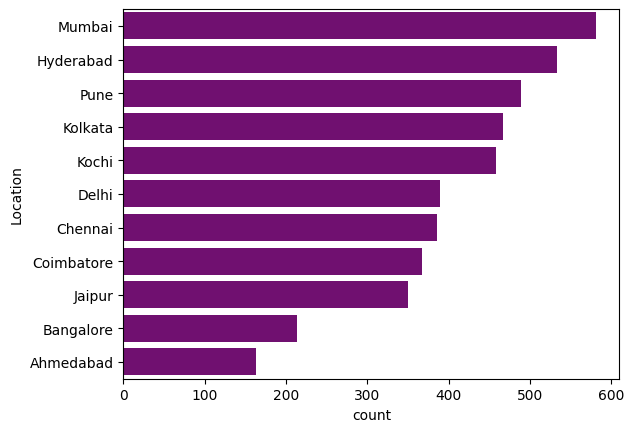

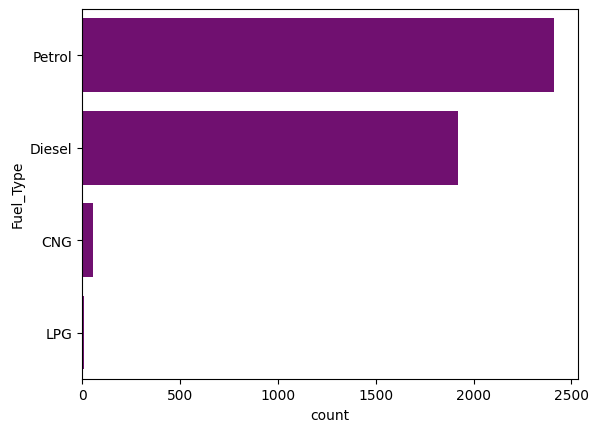

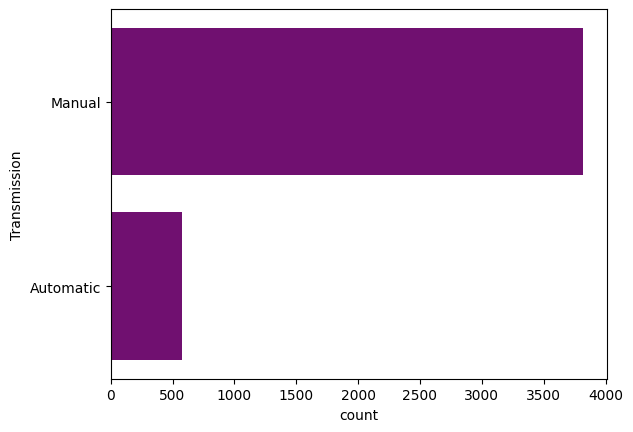

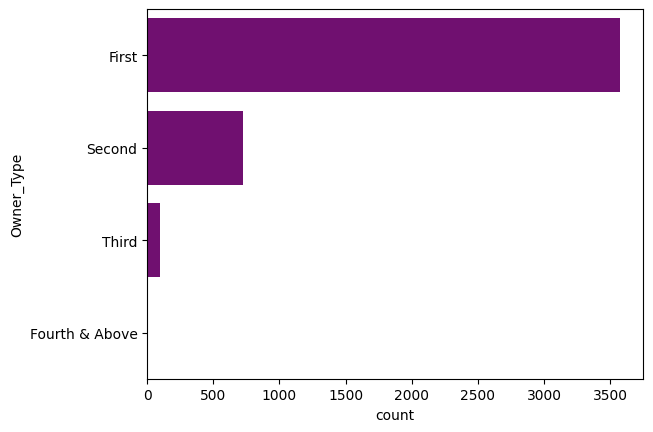

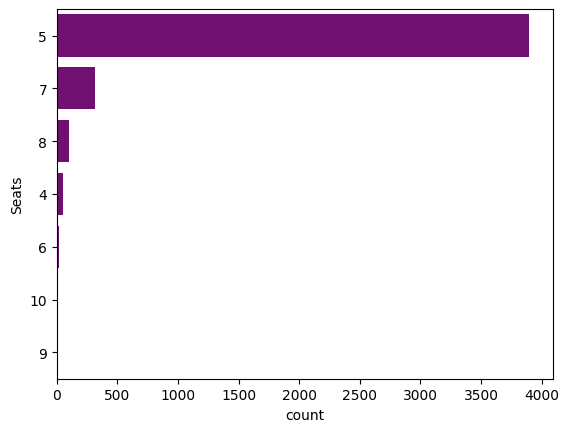

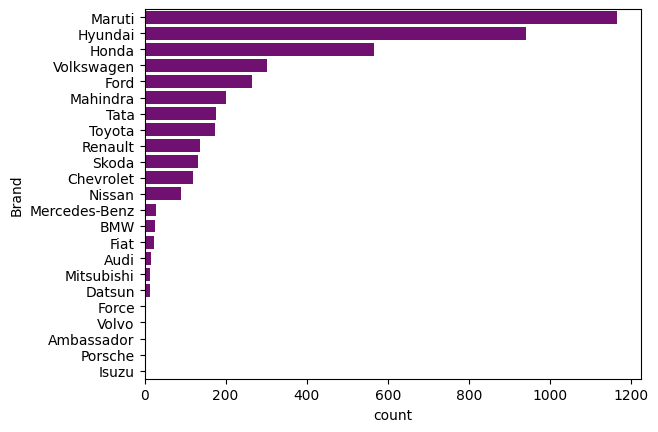

In [71]:
for col in cat_col:
    sns.countplot(budget_df[col],order=budget_df[col].value_counts().index,color="purple")
    plt.show()
    

# Analysis
These graphs show how categories like Brand, Fuel Type, Transmission, and Location are distributed.

We observe that Manual transmission and Petrol cars dominate the budget segment. A few brands contribute most of the cars, and the dataset is location-skewed toward metros.

Insight: The market for budget cars is tilted toward affordable, fuel-efficient vehicles. For modeling, categorical imbalance must be handled.

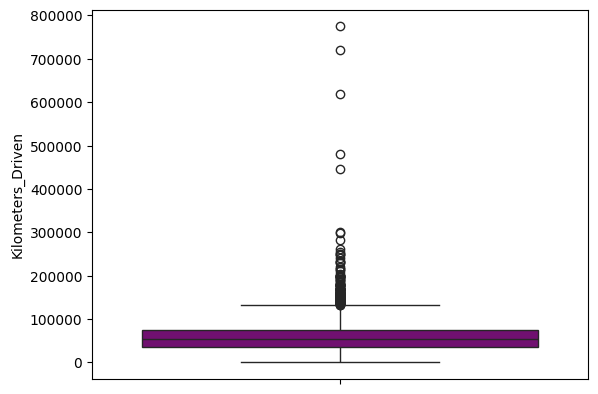

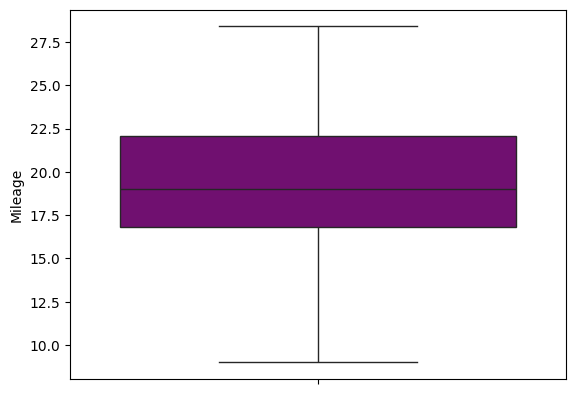

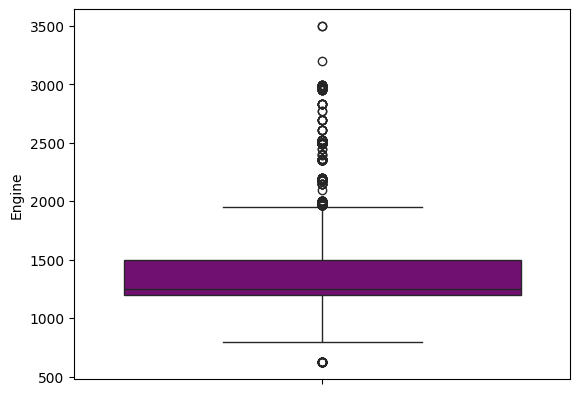

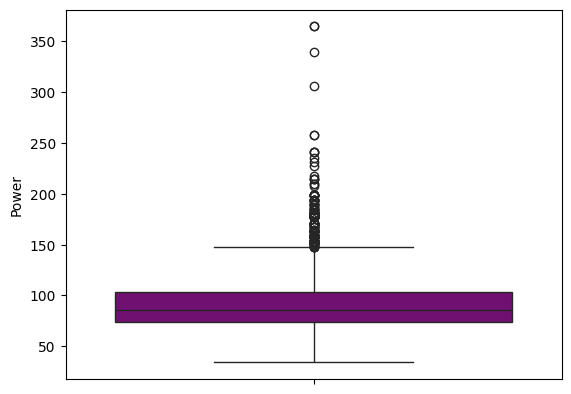

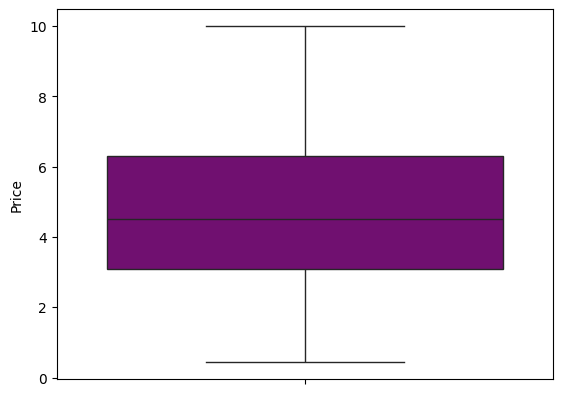

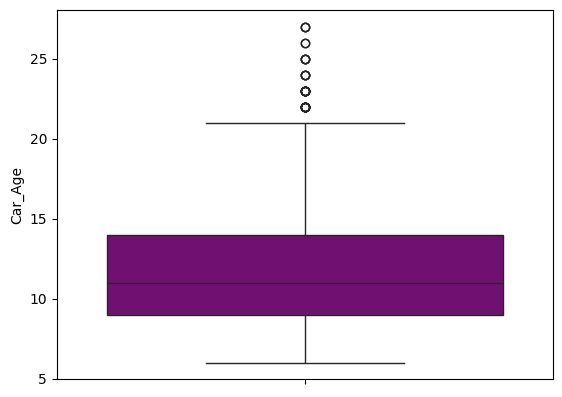

In [72]:
for col in num_col:
    sns.boxplot(budget_df[col],color="Purple")
    plt.show()

In [73]:
for col in num_col:
    Q1=budget_df[col].quantile(0.25)
    Q2=budget_df[col].quantile(0.5)
    Q3=budget_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound= Q1 - 1.5 * IQR
    upper_bound= Q3 + 1.5 * IQR
    budget_df=budget_df[(budget_df[col]>=lower_bound) & (budget_df[col]<=upper_bound)]

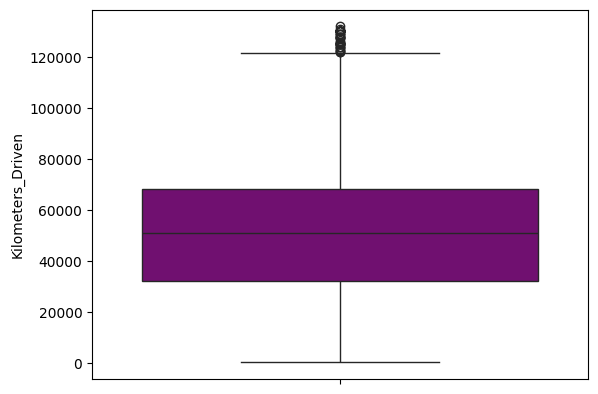

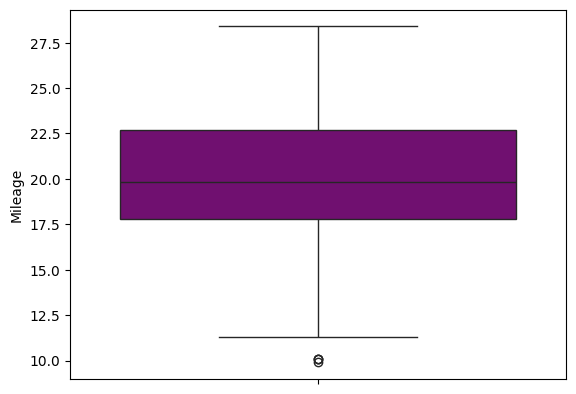

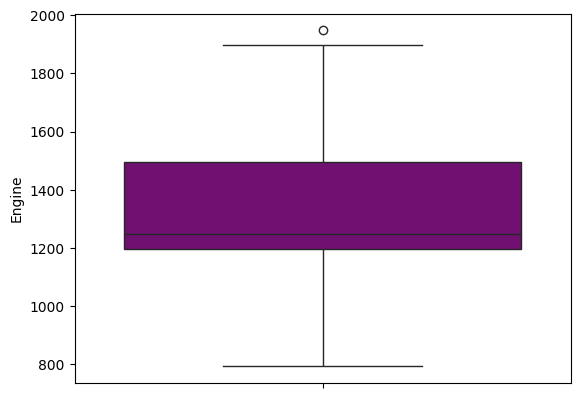

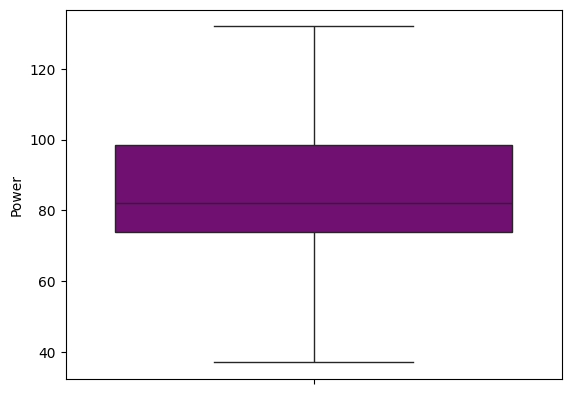

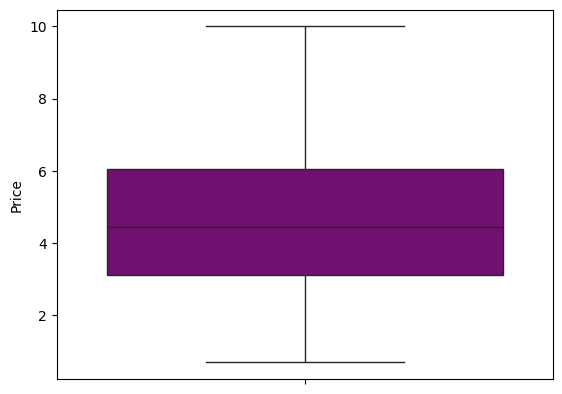

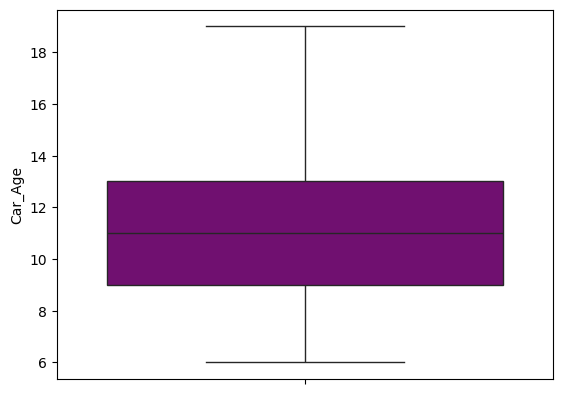

In [74]:
for col in num_col:
    sns.boxplot(budget_df[col],color="purple")
    plt.show()


# Analysis
These plots summarize continuous variables such as Price, Mileage, Engine, Power, Kilometers Driven, and Car Age.

Mileage: Mostly concentrated around 18 kmpl, with very few extreme values.

Price, Engine, Power: Show many outliers with long upper tails.

Car Age: Cars range between 6 and 27 years.

Insight: Outliers in Price/Engine/Power can distort predictions. Transformations or capping are required

# Bivariate EDA


<Figure size 1200x800 with 0 Axes>

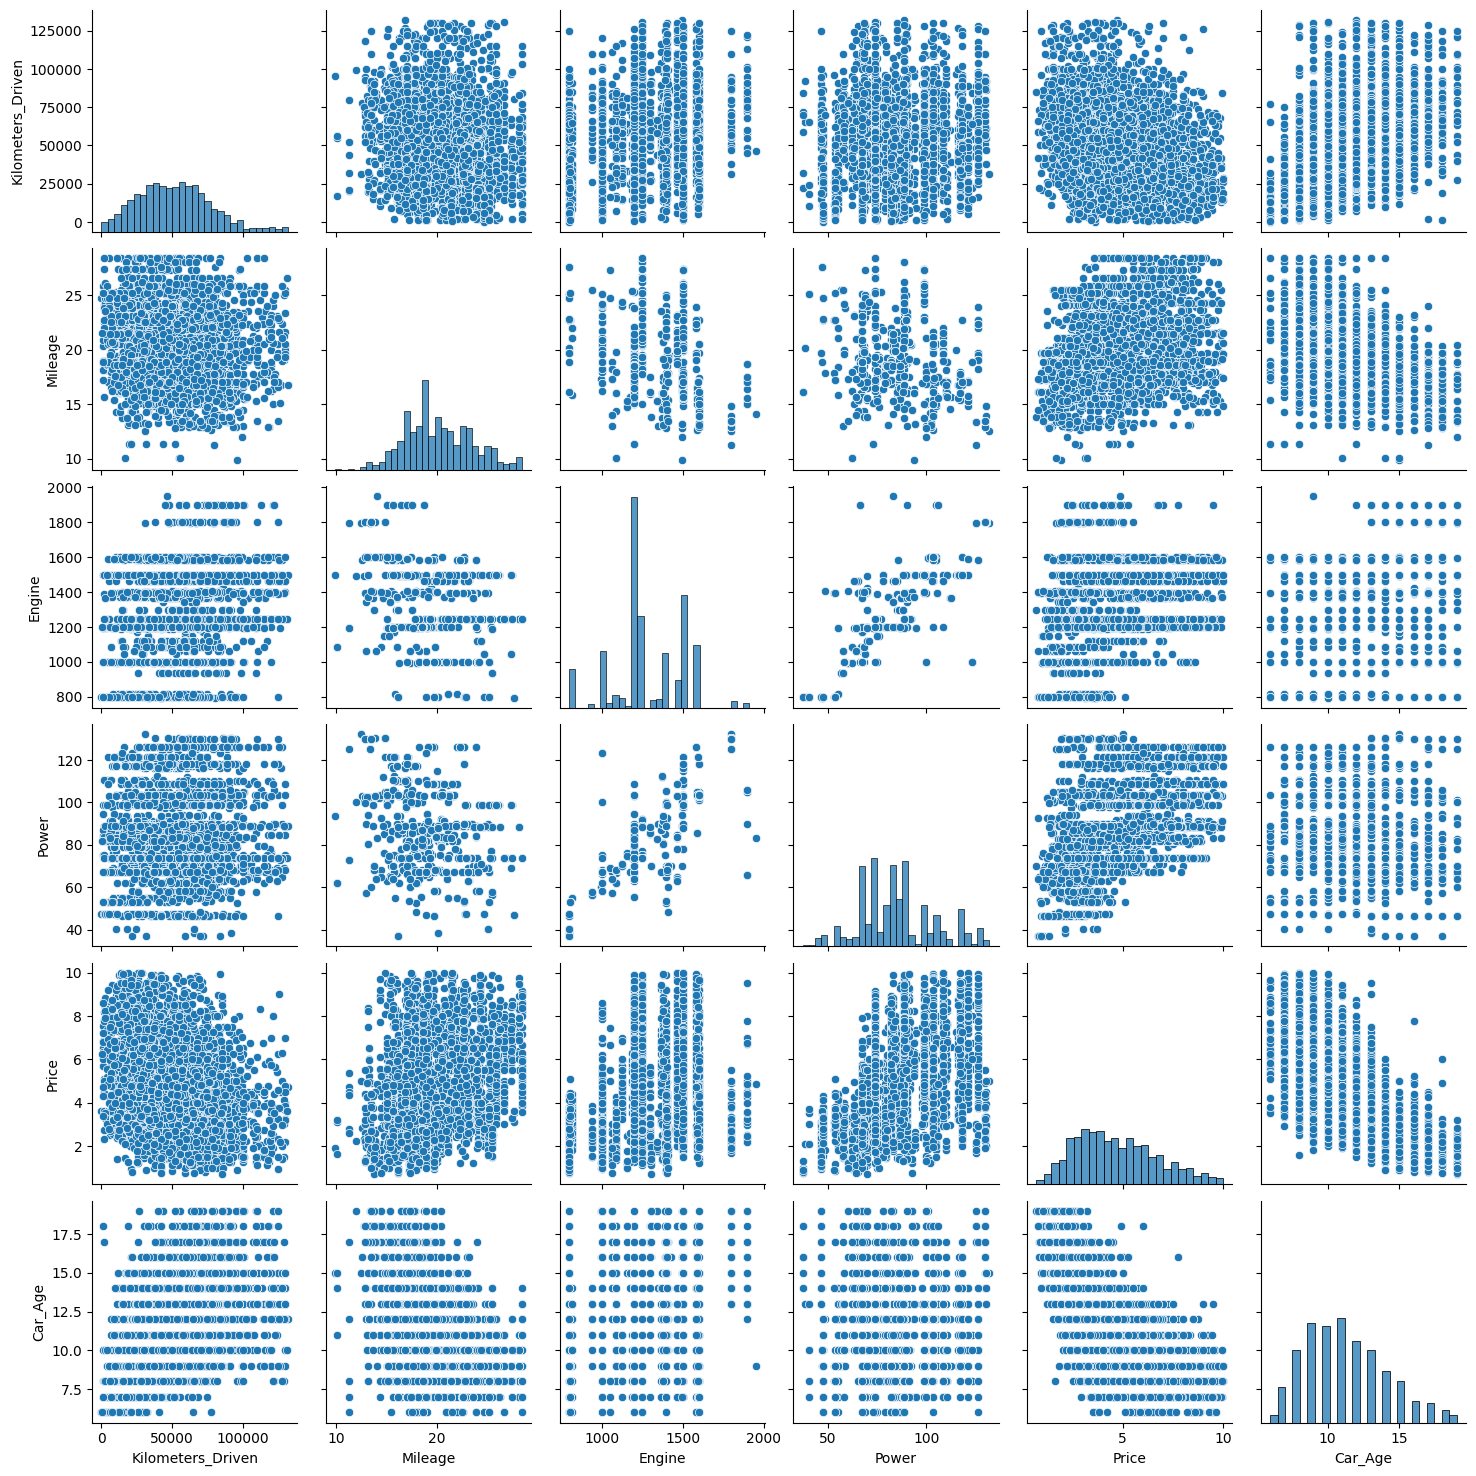

In [76]:
plt.figure(figsize=(12,8))
sns.pairplot(data=budget_df)
plt.show()

-  Engine, Power, and Price show strong positive correlations, indicating that higher engine capacity and power typically lead to higher car prices.
- Mileage has a slight negative correlation with Price, suggesting fuel-efficient cars may be less expensive or less performance-oriented.
- Kilometers_Driven and Car_Age display weak or scattered relationships with Price, implying depreciation varies across models and conditions.
- Histograms on the diagonal reveal skewed distributions, especially for Price and Power, with a few high-value outliers.
- Price distribution is right-skewed, indicating most cars are priced lower, with a few luxury or high-performance models pulling the average up.
- Engine vs Power shows a tight linear relationship, reinforcing their mechanical interdependence.
- Mileage vs Power suggests a trade-off—more powerful cars tend to be less fuel-efficient.
- Car_Age vs Kilometers_Driven shows expected positive correlation, but with variability hinting at different usage patterns.
- The plot helps identify which variables are most predictive of price, useful for regression modeling or feature selection.
- Overall, it’s a valuable tool for spotting trends, outliers, and guiding further statistical or machine learning analysis.
Want to dive into modeling next or explore feature engineering strategies?


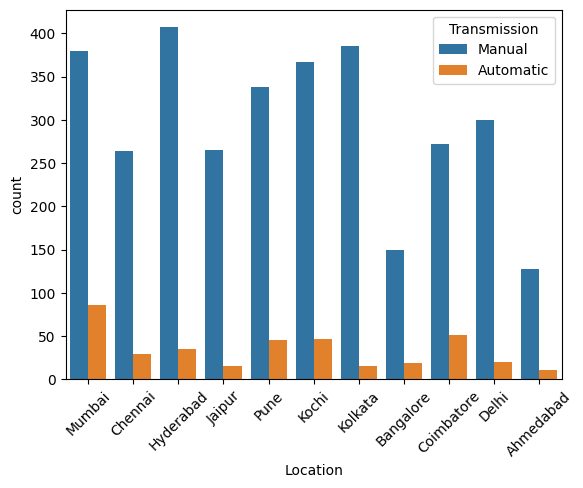

In [78]:
# plt.figure(figsize=(12,4))
sns.countplot(data=budget_df,x=budget_df["Location"],hue=budget_df["Transmission"])
plt.xticks(rotation=45)
plt.show()

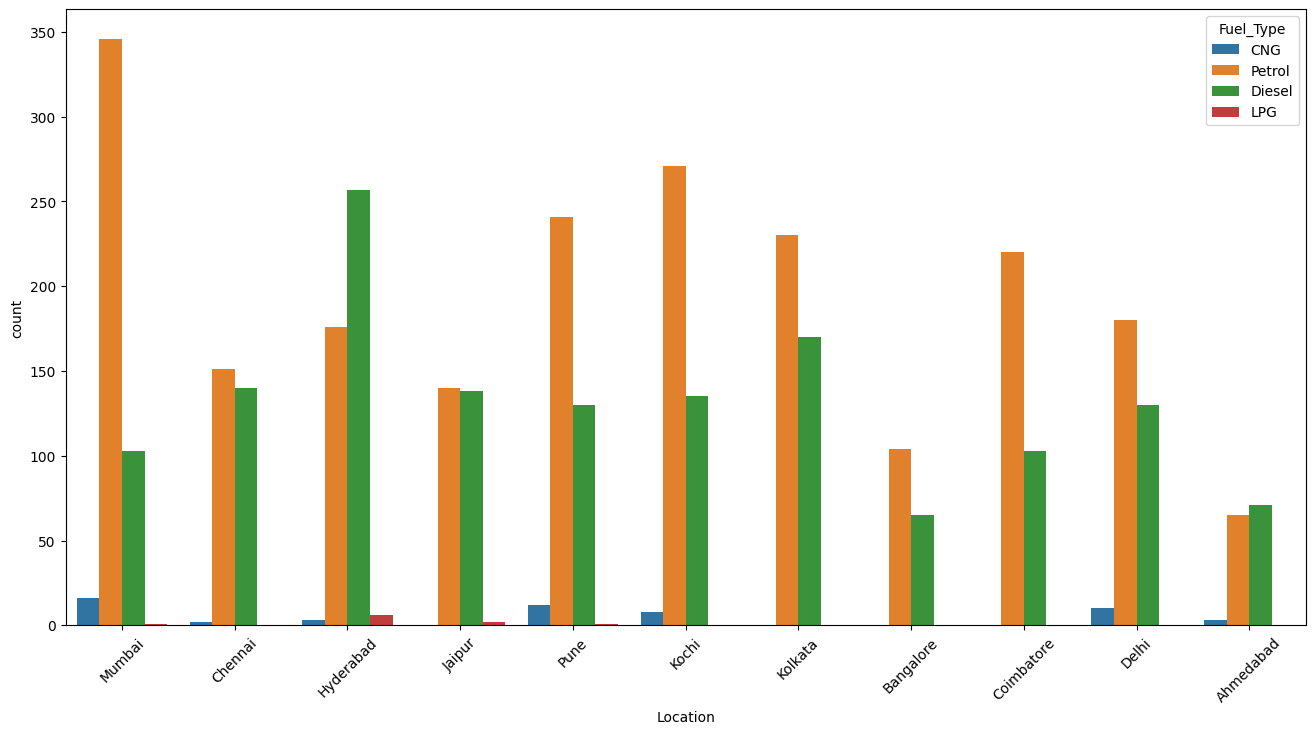

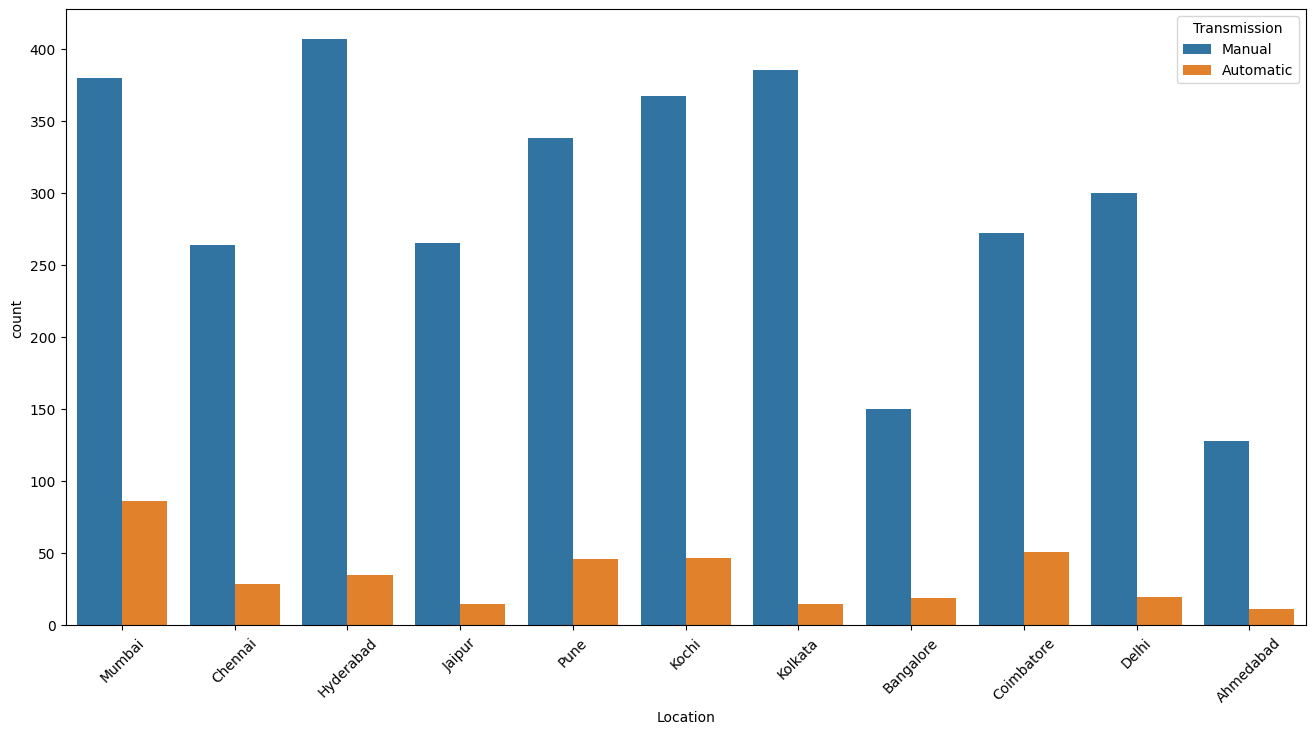

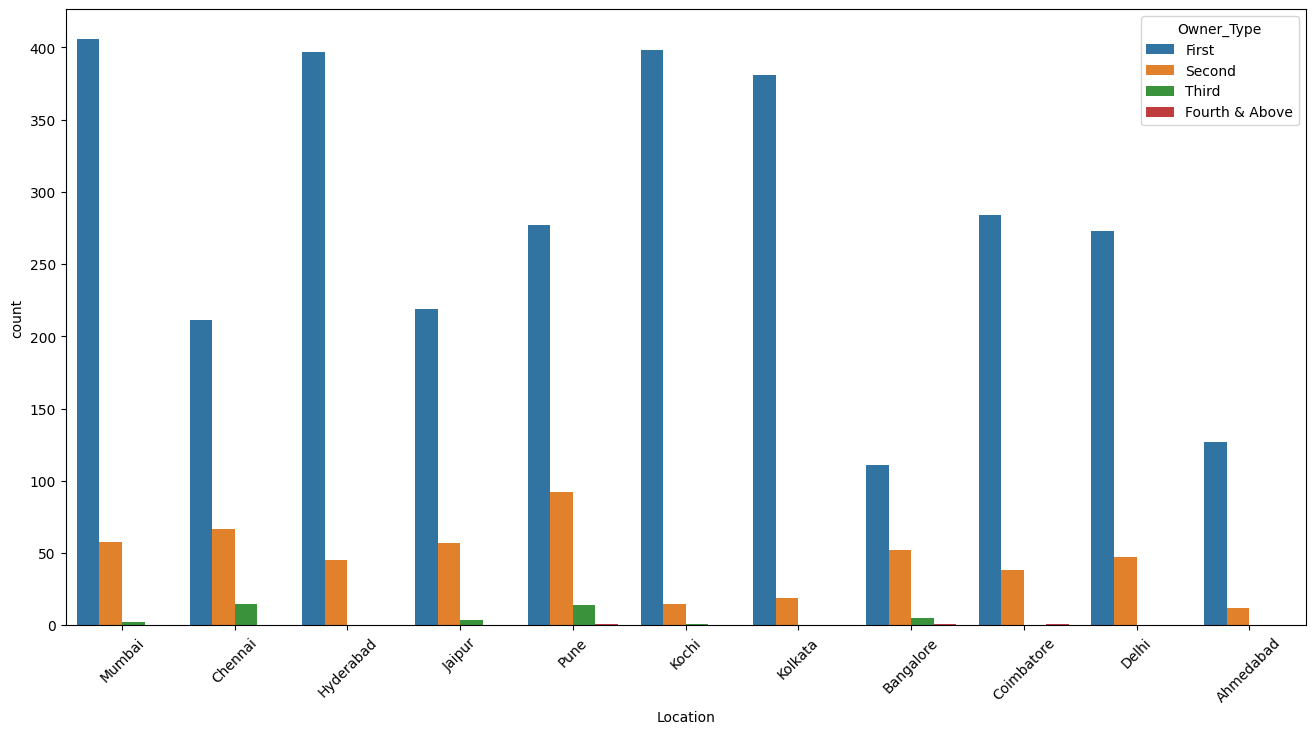

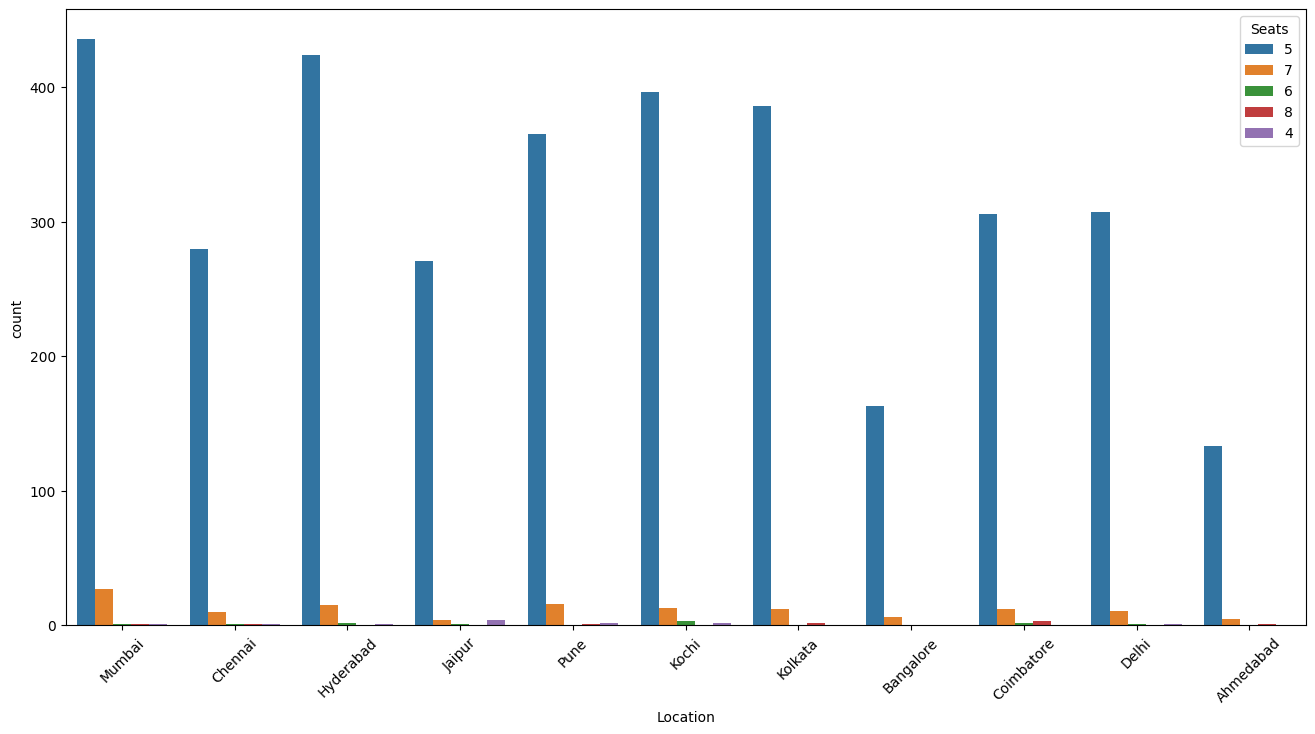

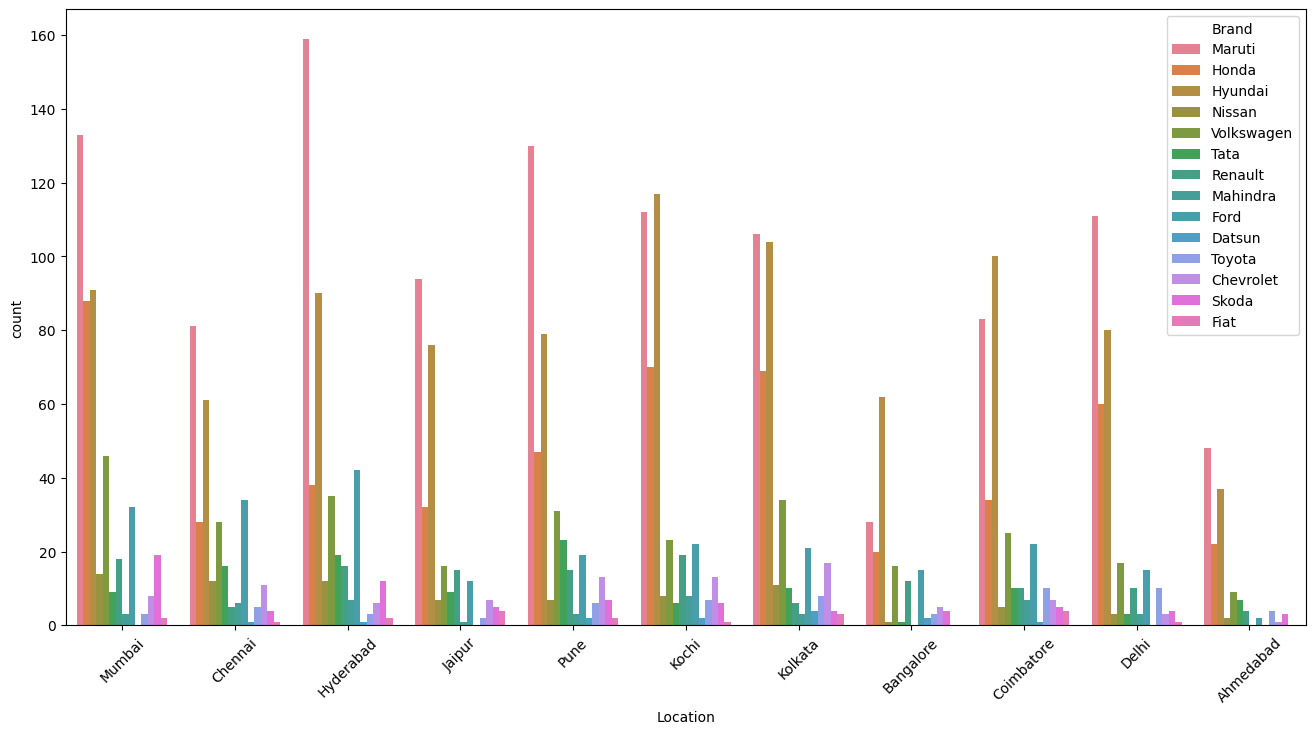

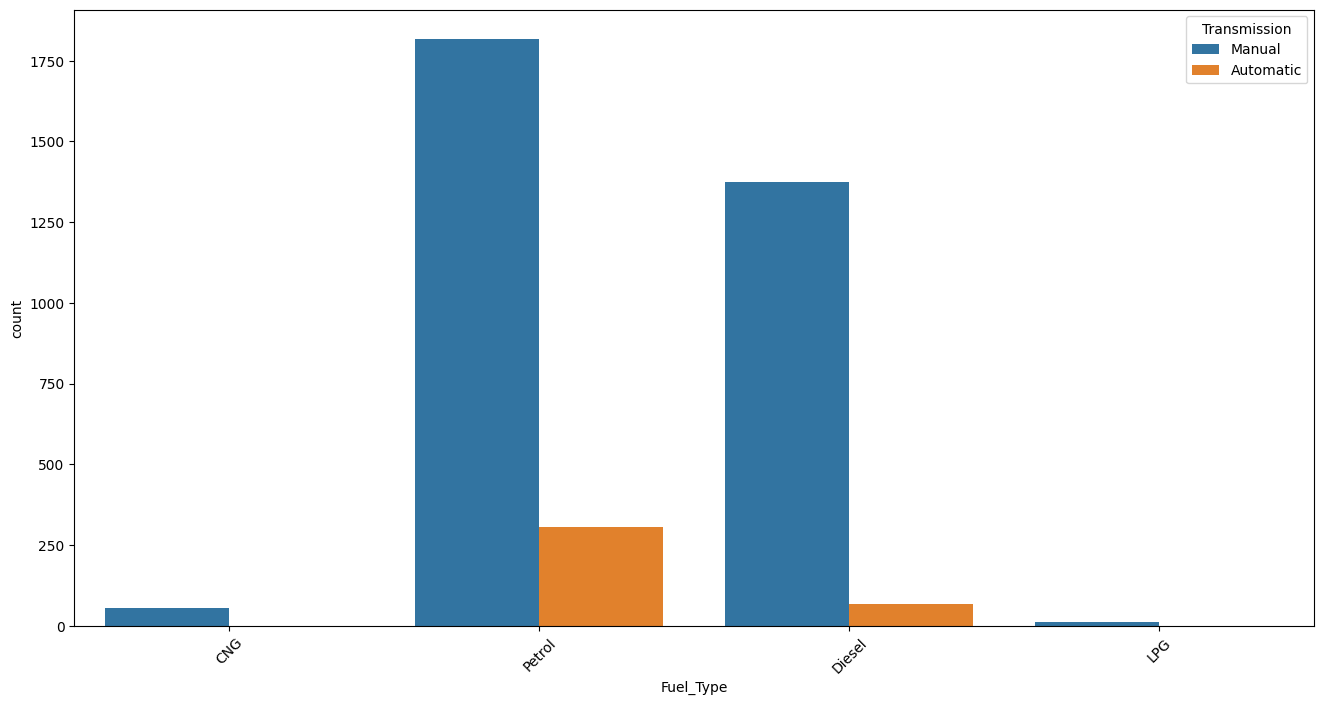

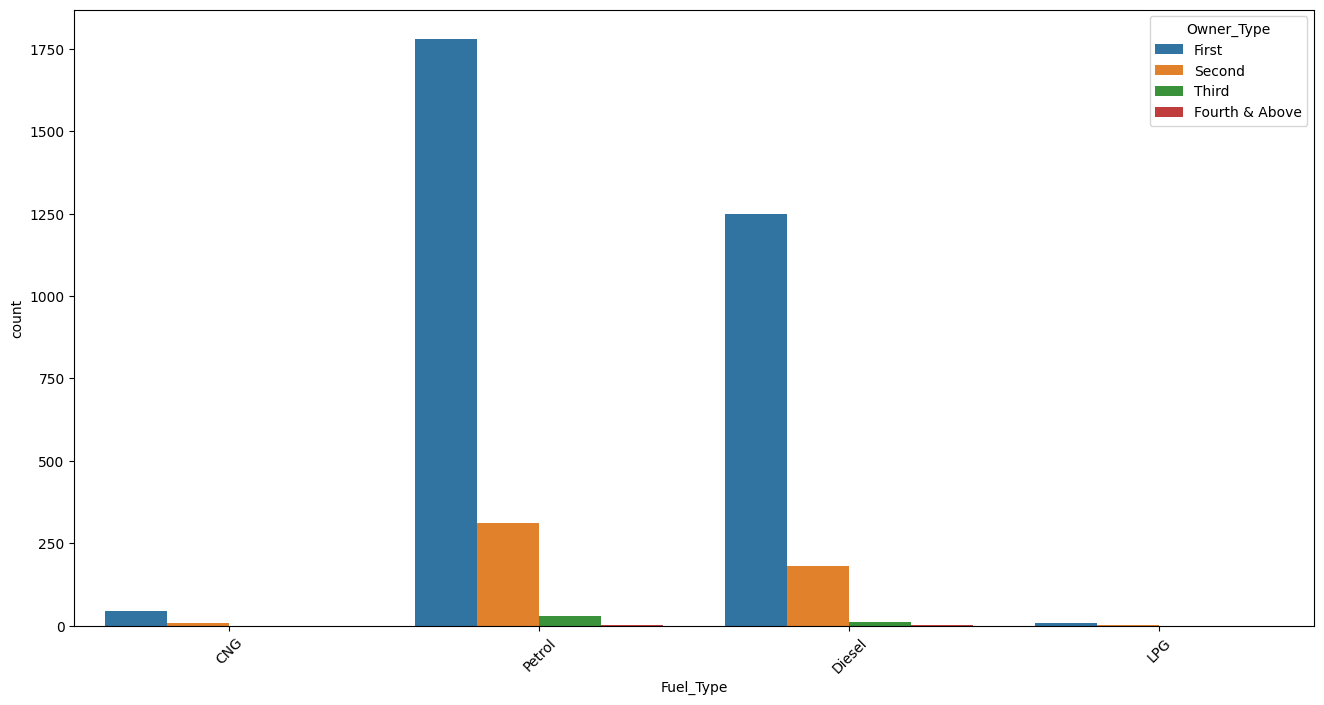

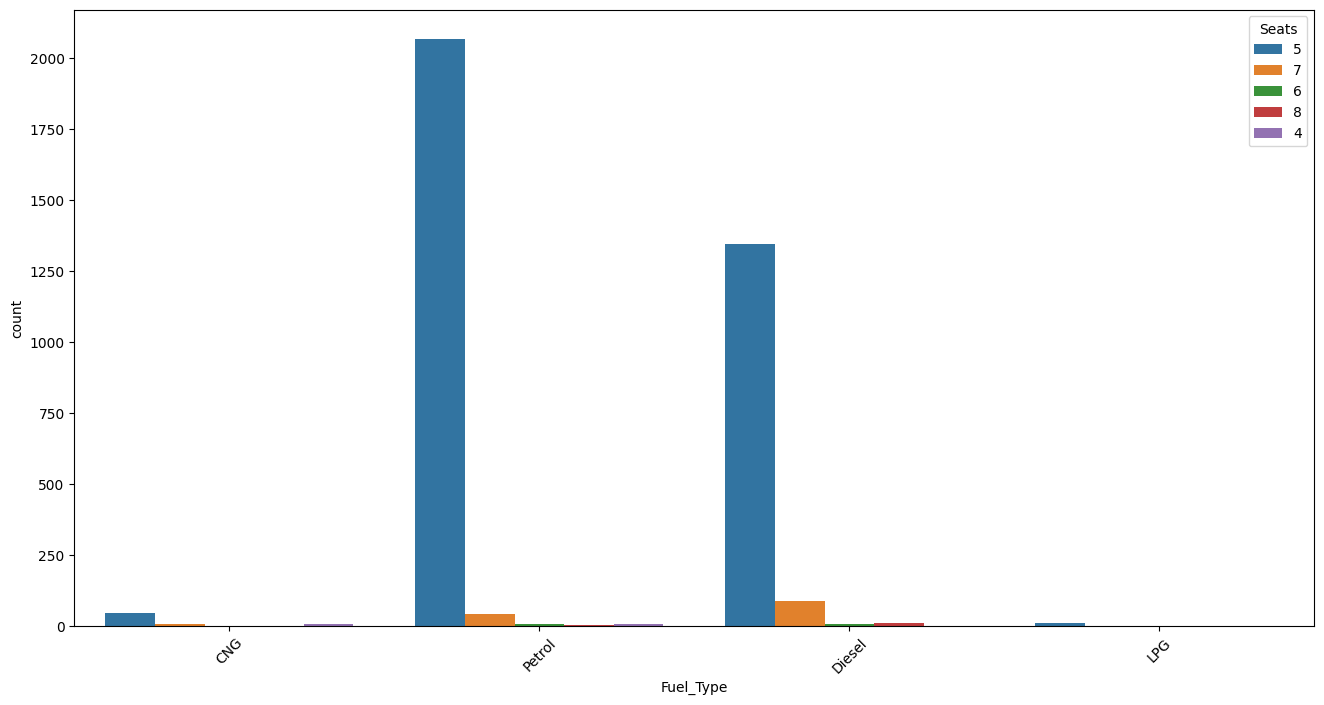

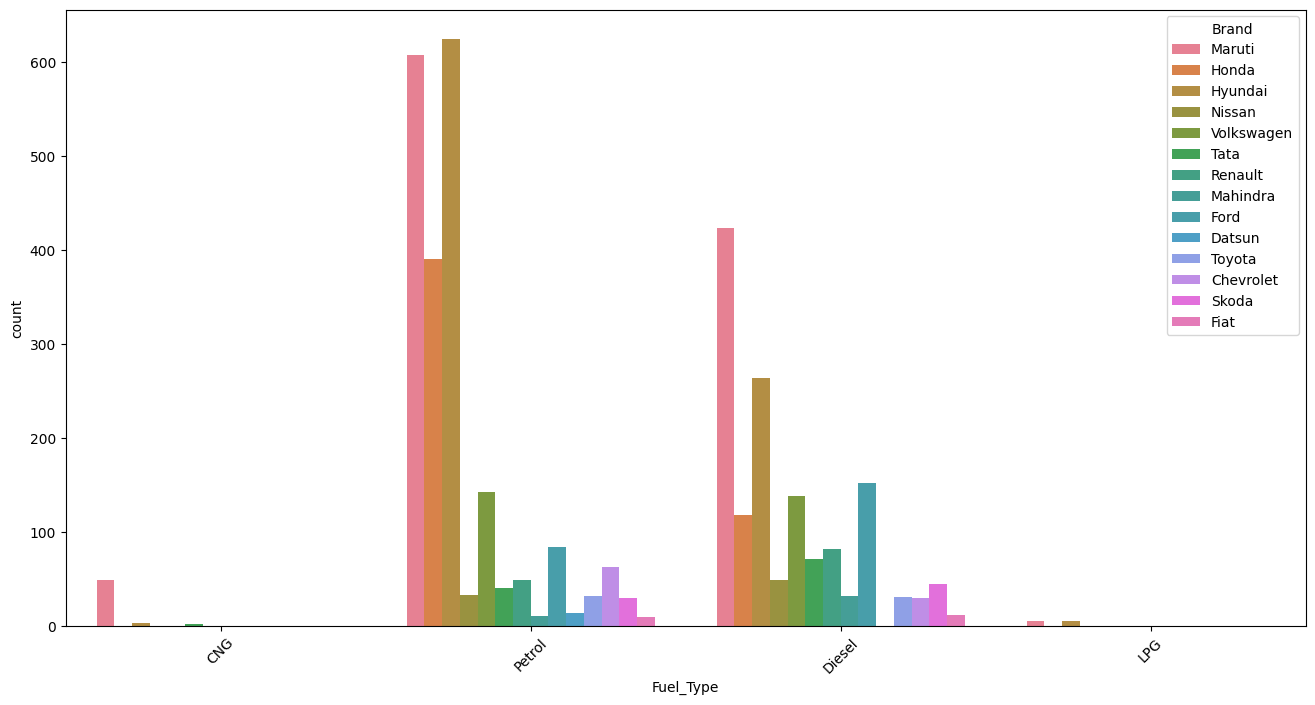

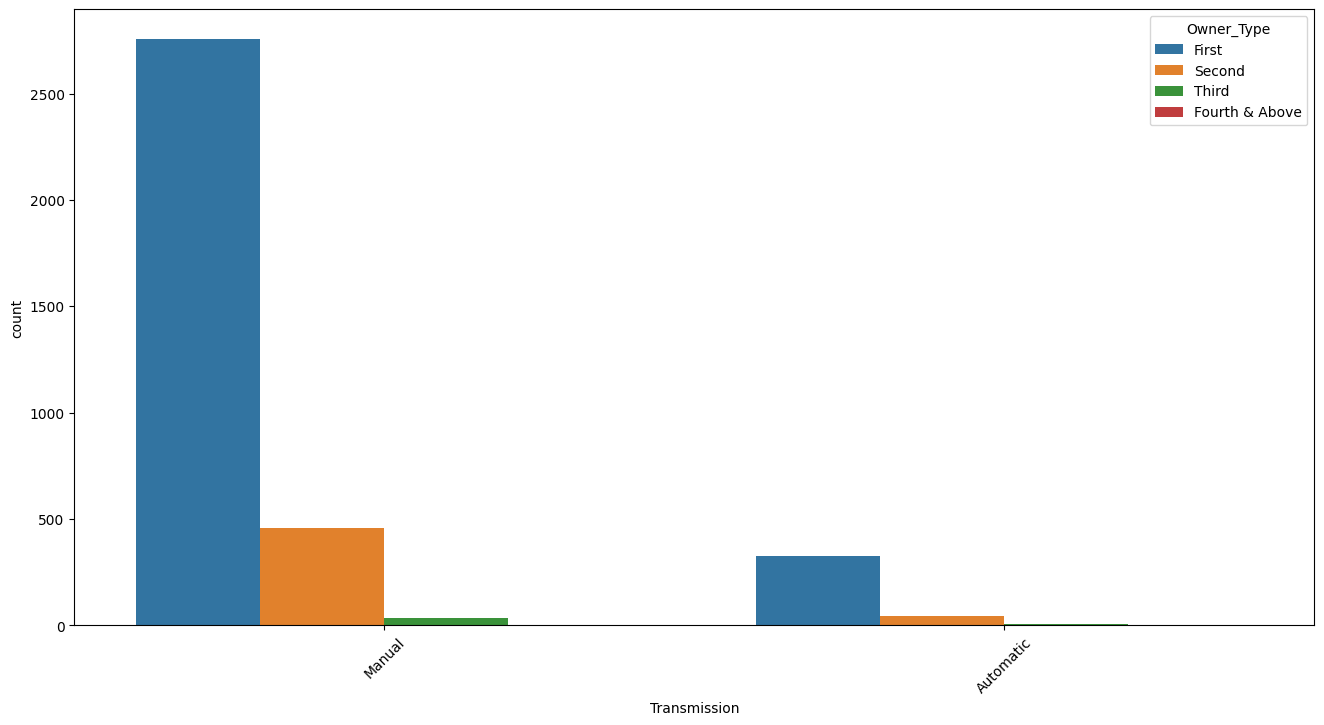

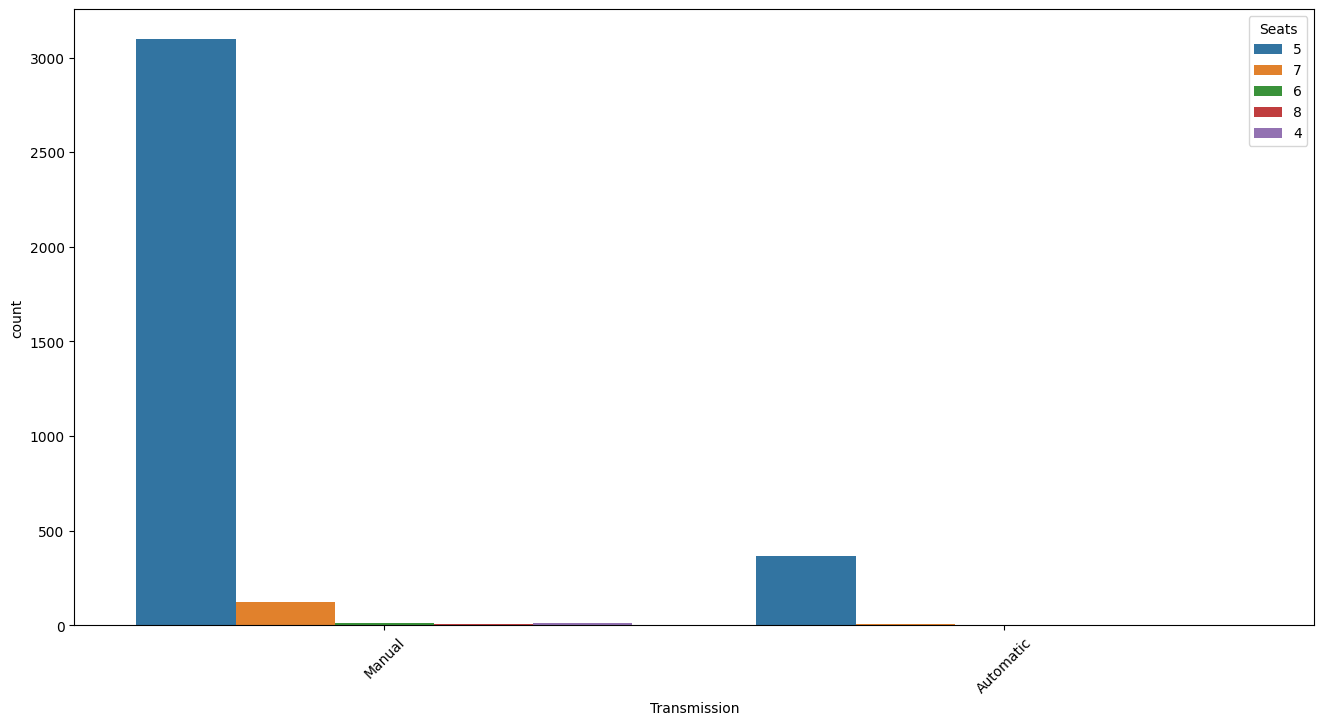

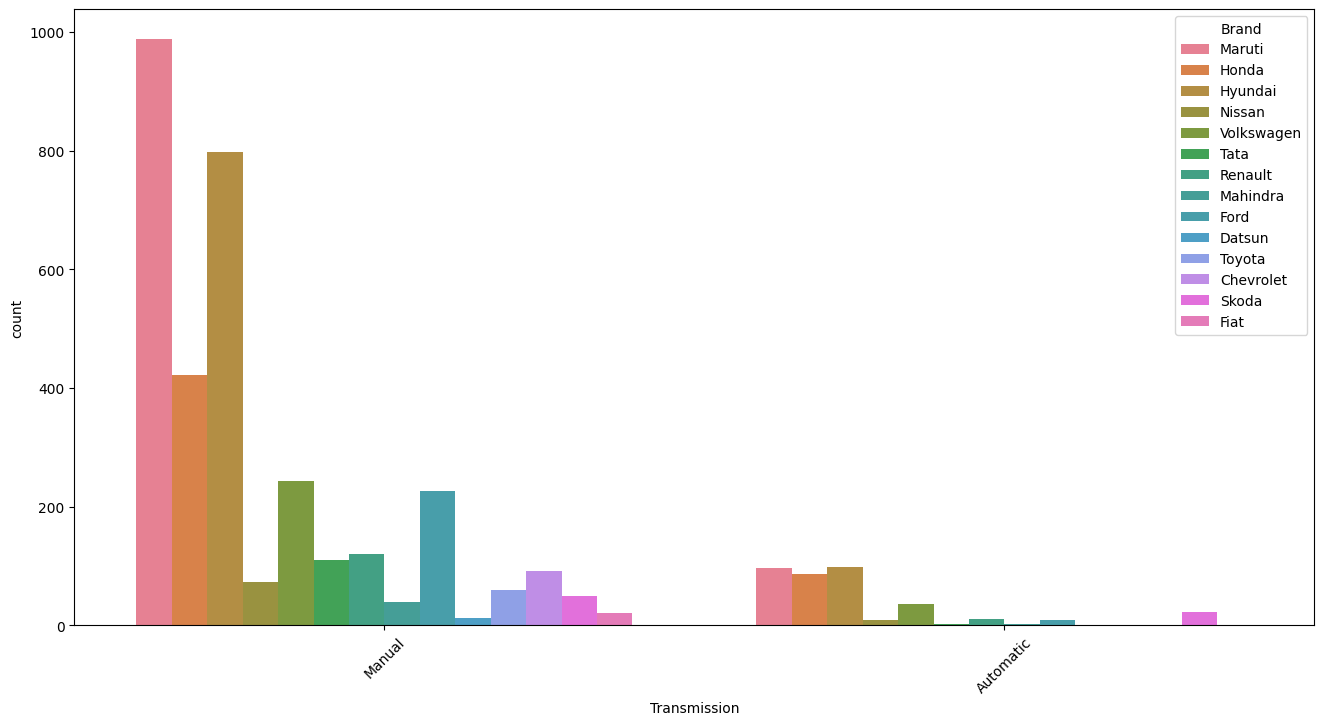

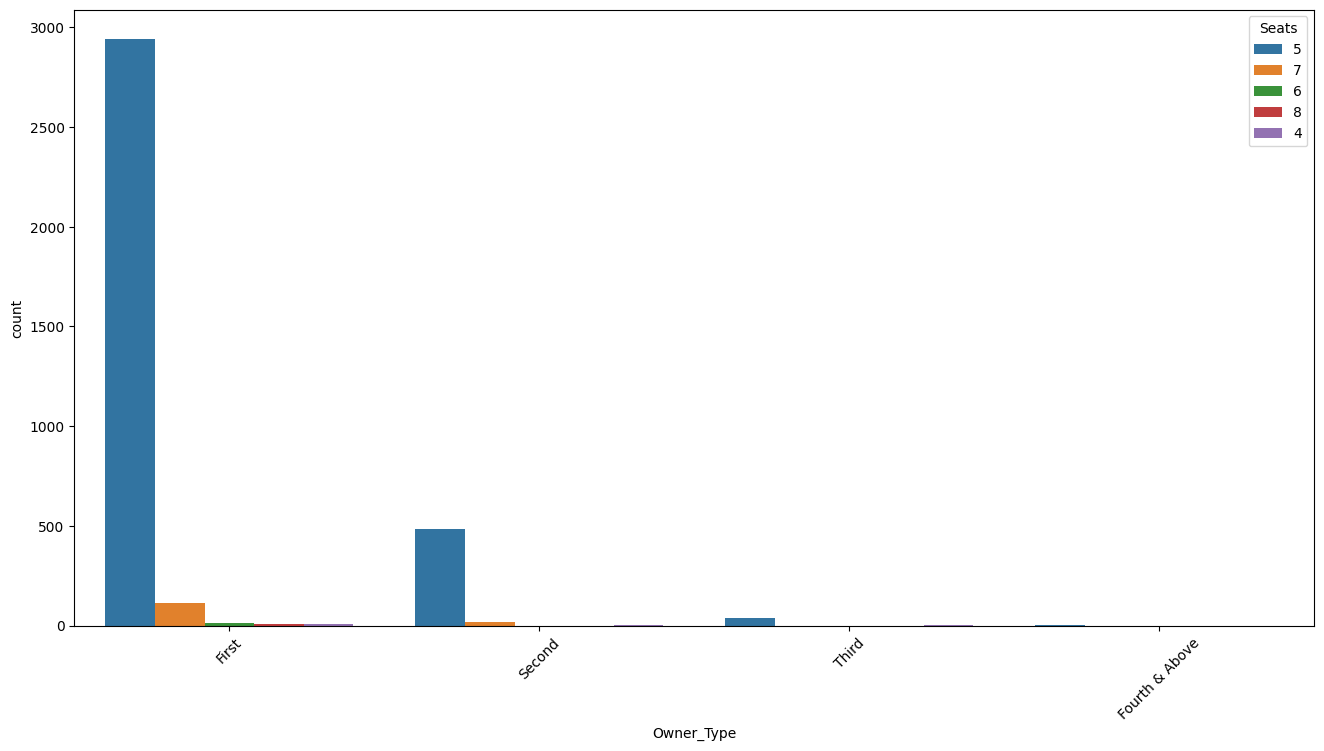

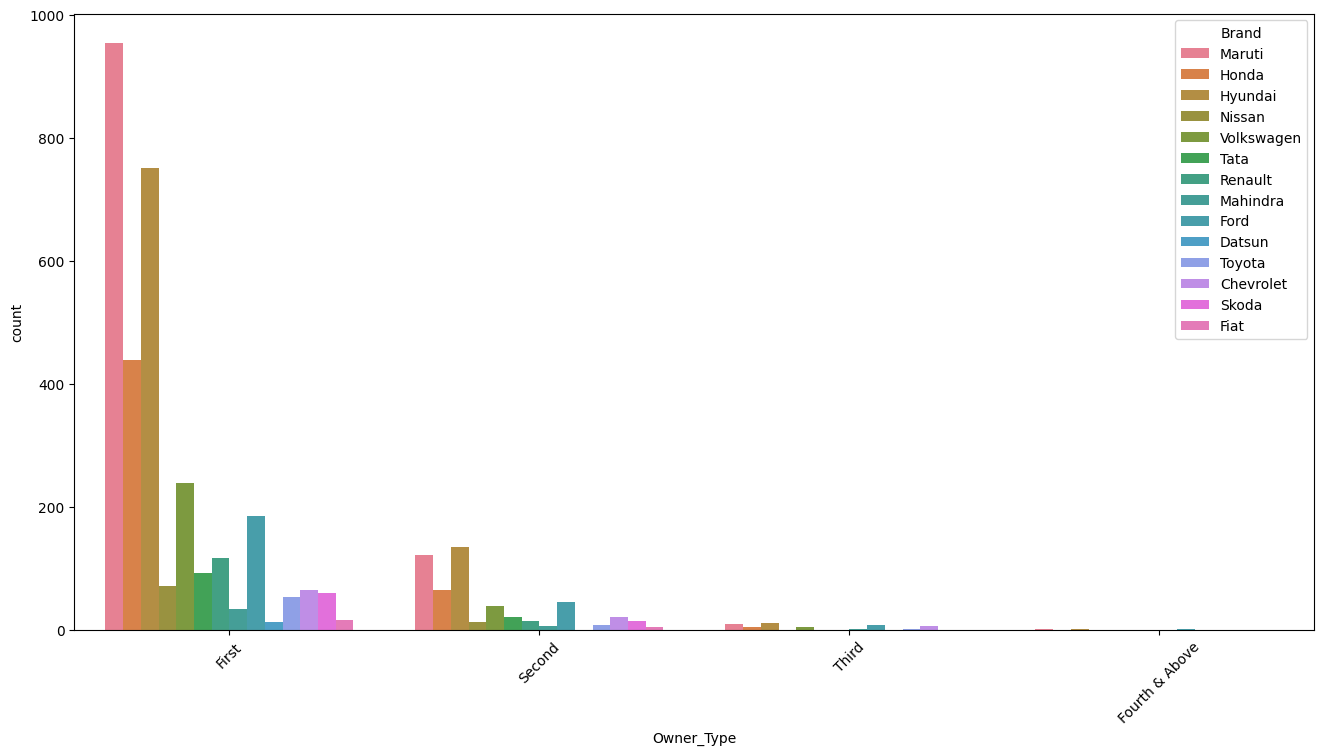

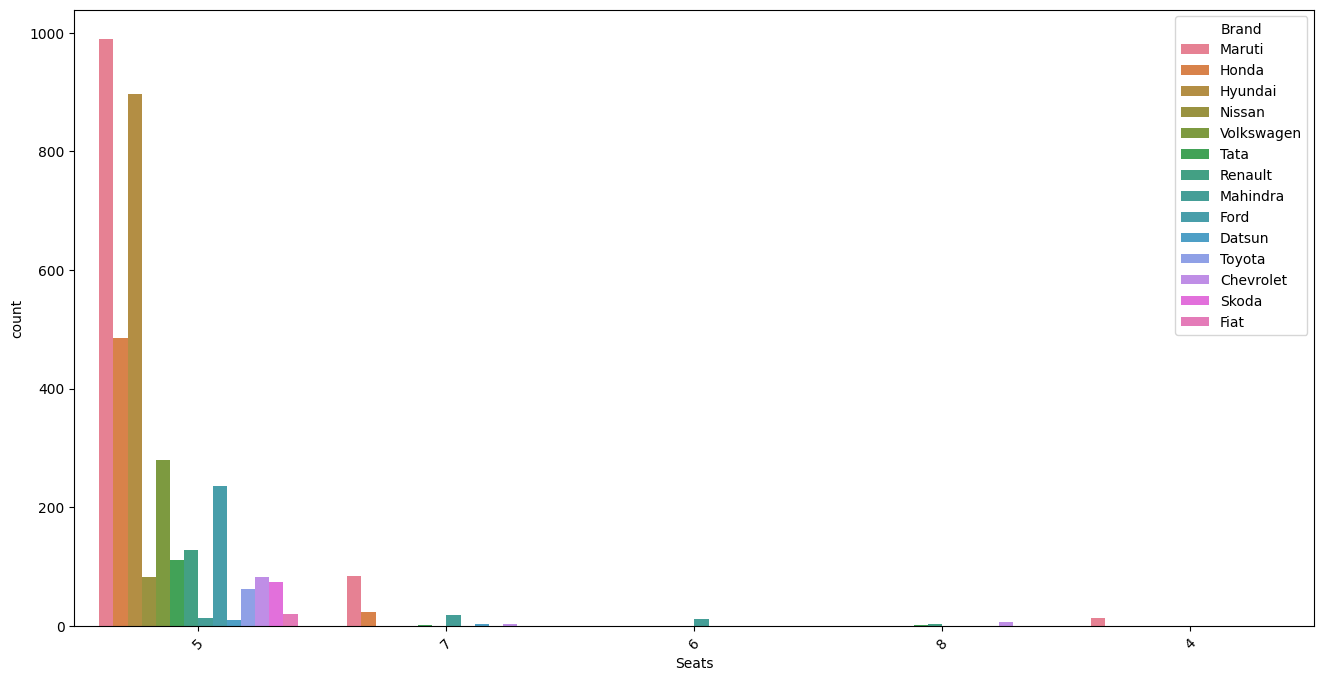

In [79]:
list1=[]
count=0
for col1 in cat_col:
    for col2 in cat_col:
        if col1==col2 or (col1,col2) in list1 or (col2,col1) in list1:
            continue
        else:
            plt.figure(figsize=(16,8))
            sns.countplot(data=budget_df,x=budget_df[col1],hue=budget_df[col2])
            list1.append((col1,col2))
            plt.xticks(rotation=45)
            plt.show()
            count+=1

# Analysis
Compares Transmission types across Locations.

Manual dominates across most cities, while Automatics are concentrated in metro locations.

Insight: Location plays a role in preference; Manual cars are a safe choice for budget buyers, Automatics appeal more to urban customers.

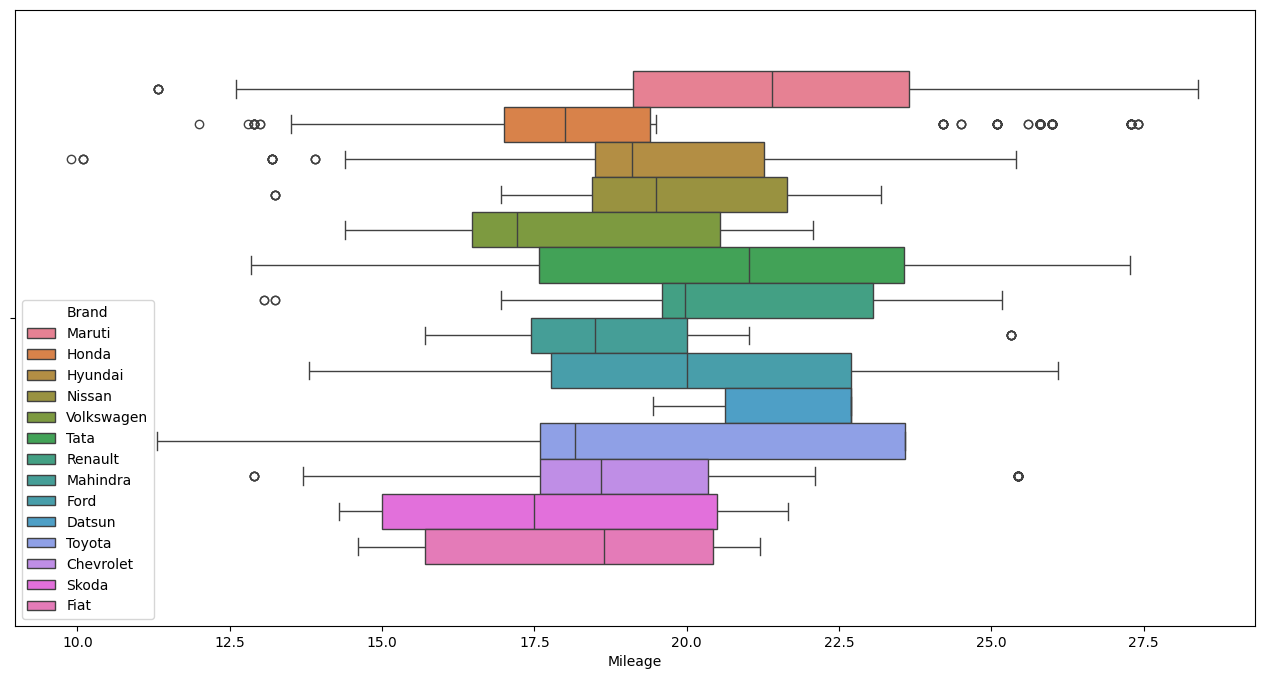

In [80]:
# sns.boxplot(data=budget_df,x=budget_df[""],y=budget_df["Price"])
plt.figure(figsize=(16,8))
sns.boxplot(data=budget_df,x=budget_df["Mileage"],hue="Brand")
plt.show()

# Analysis
Cross-plots like Fuel vs Transmission, Brand vs Fuel, etc.

Many brands stick to Petrol + Manual, while Diesel appears in higher-end brands.

Insight: Certain category combinations dominate the dataset. This shows customer tendencies and helps in targeted marketing.

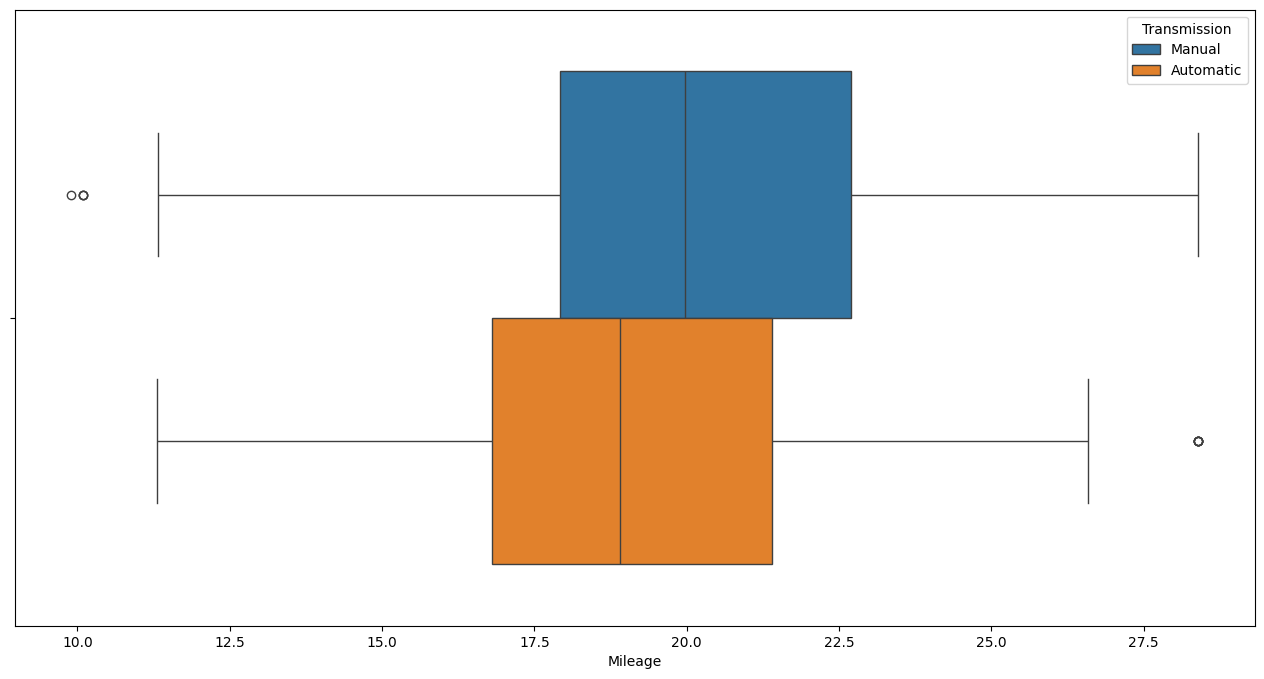

In [81]:
plt.figure(figsize=(16,8))
sns.boxplot(data=budget_df,x=budget_df["Mileage"],hue="Transmission")
plt.show()

# Analysis
Shows mileage distribution across brands.

Japanese brands tend to deliver higher mileage, while some luxury-leaning brands show poor efficiency.

Insight: Brand perception is reinforced by performance metrics — buyers can be segmented by “efficiency seekers vs premium seekers.”

# Bivariate Analysis inclued 3 types:
    
1. Numerical vs Numerical
        a Scatter Plot-Used to show relationship between two continuous variables
        b. Pair Plot - Matrix of scatter plots for multiple numerical variables
        
2. Categorical vs Categorical
        a. Grouped Bar Plot - Used hue in sns.countplot to show relationship between two categorical variables
        b. Stacked Bar Plot - Create Frequency table and plot it using pandas 
        
3. Categorical vs Numerical 
         a. Box Plot with hue - Used to show distribution of numerical variable across different categories of categorical variable
        b. Violin Plot - Similar to box plot but also shows kernel density estimation of the data


In [84]:
crosstab=pd.crosstab(budget_df["Location"],budget_df["Transmission"])
crosstab

Transmission,Automatic,Manual
Location,,
Ahmedabad,11,128
Bangalore,19,150
Chennai,29,264
Coimbatore,51,272
Delhi,20,300
Hyderabad,35,407
Jaipur,15,265
Kochi,47,367
Kolkata,15,385


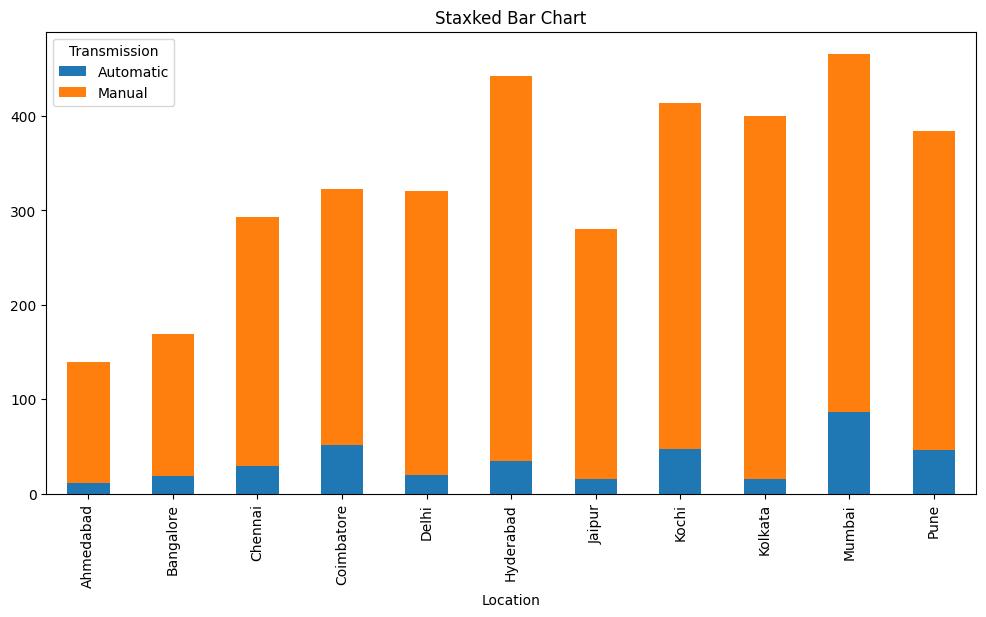

In [85]:
crosstab.plot(kind="bar",stacked=True,figsize=(12,6))
plt.title("Staxked Bar Chart")
plt.show()

# Analysis
Compares mileage across Manual vs Automatic cars.

Manual cars give higher mileage, Automatics lower mileage but better comfort.

Insight: Useful for marketing: Manuals appeal to budget-sensitive buyers, Automatics to convenience seekers.

In [144]:
cat_col_lux=luxury_df.select_dtypes(include=['object']).columns.tolist()
num_col_lux=luxury_df.select_dtypes(exclude=['object']).columns.tolist()
cat_col_lux,num_col_lux


(['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats', 'Brand'],
 ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price', 'Car_Age'])

In [146]:
luxury_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Kilometers_Driven,1266.0,50130.061611,26286.534638,1000.00,30520.000,47190.500,65573.75,122086.00
Mileage,1266.0,15.631556,3.241215,8.20,12.990,15.290,17.83,24.30
Engine,1266.0,2191.517378,453.011667,1248.00,1968.000,2143.000,2494.00,3198.00
Power,1266.0,167.957314,38.068369,87.20,140.000,171.000,187.74,265.00
Price,1266.0,21.208673,9.573633,10.05,13.375,18.425,27.00,50.97
Car_Age,1266.0,10.259084,2.394827,6.00,8.000,10.000,12.00,18.00


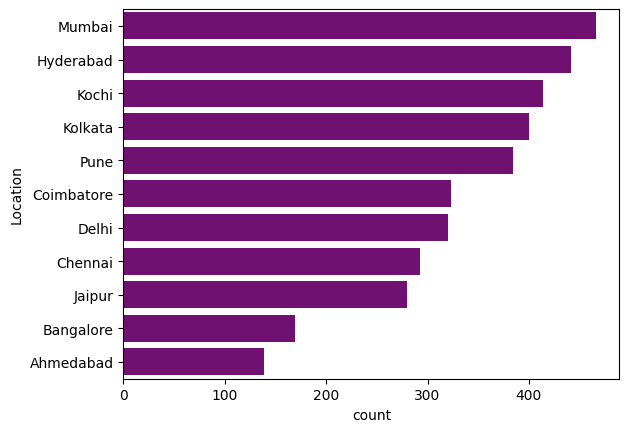

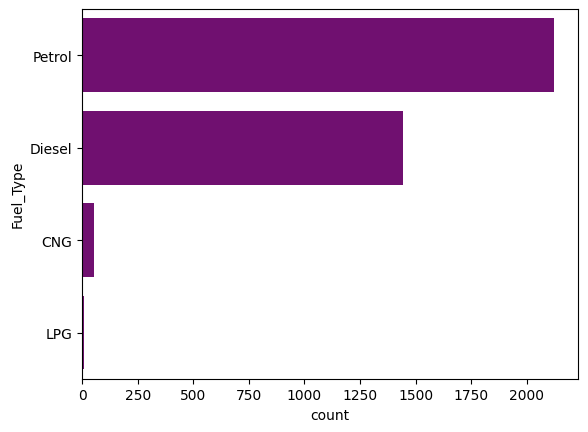

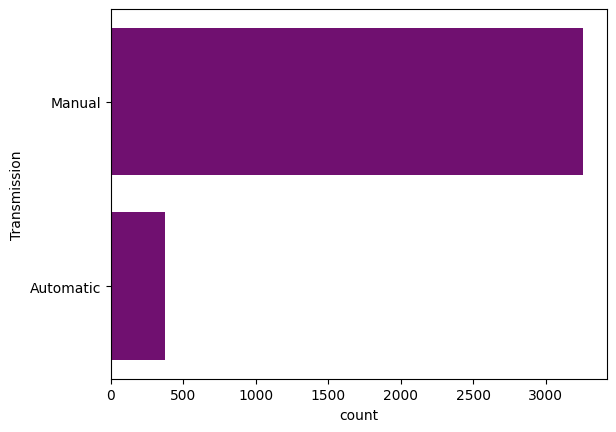

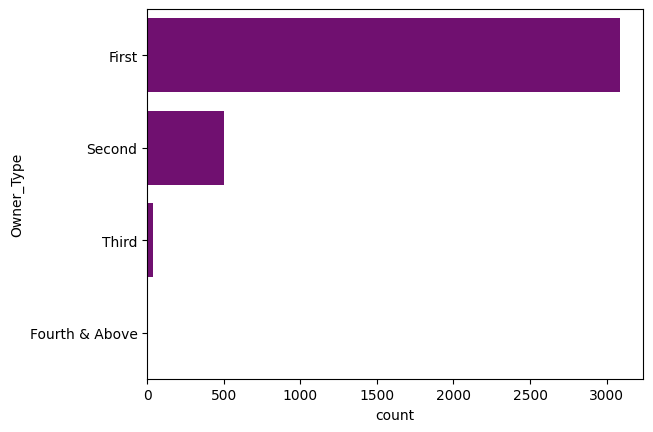

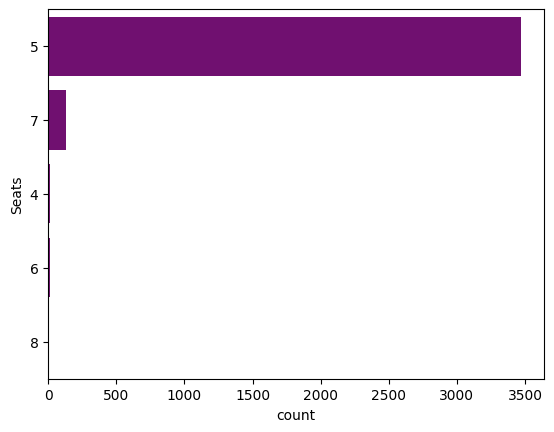

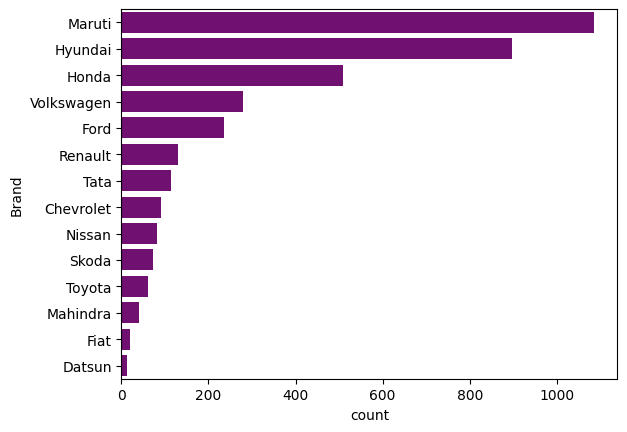

In [88]:
for col in cat_col_lux:
    sns.countplot(budget_df[col],order=budget_df[col].value_counts().index,color="purple")
    plt.show()
    

# Analysis
A stacked visualization of categorical interactions.

Helps compare proportions, e.g., how different fuel types stack within brands.

Insight: Highlights overlaps among categories, making it clear which combinations dominate the market.

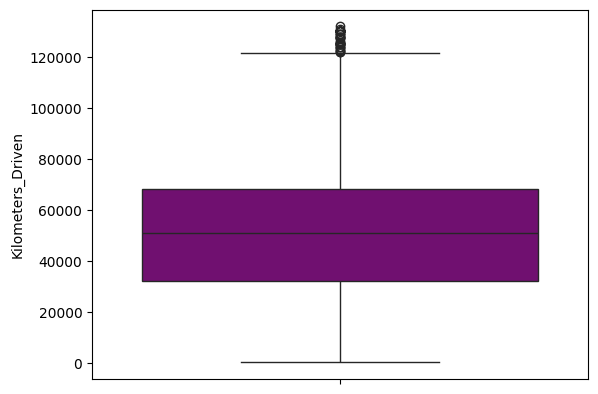

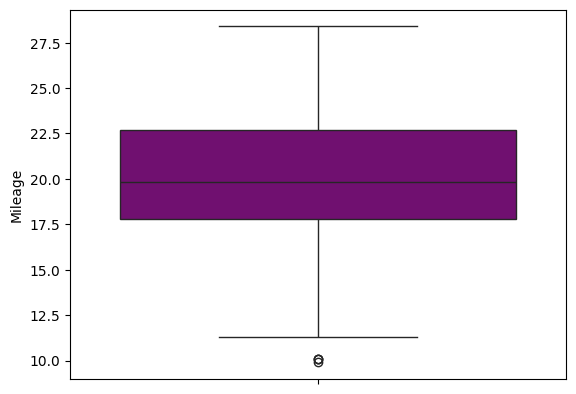

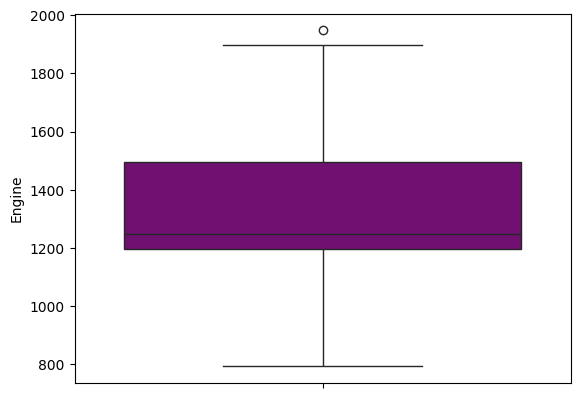

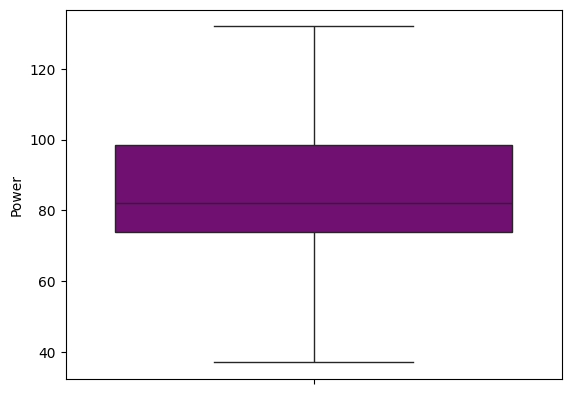

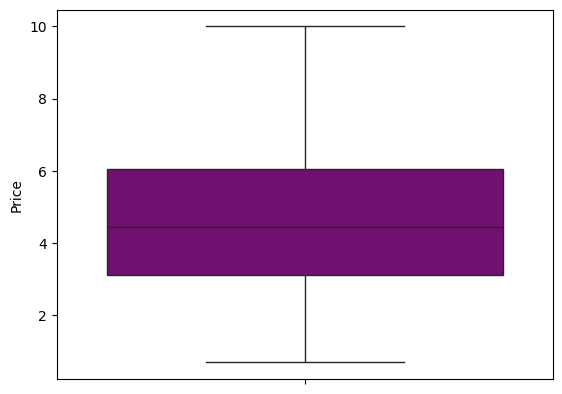

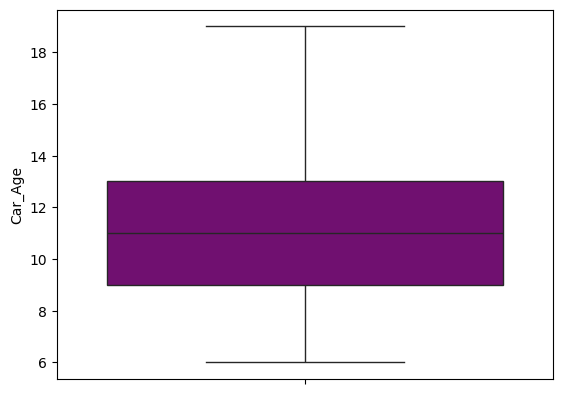

In [91]:
for col in num_col_lux:
    sns.boxplot(budget_df[col],color="Purple")
    plt.show()

In [92]:
for col in num_col_lux:
    Q1=luxury_df[col].quantile(0.25)
    Q2=luxury_df[col].quantile(0.5)
    Q3=luxury_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound= Q1 - 1.5 * IQR
    upper_bound= Q3 + 1.5 * IQR
    luxury_df=luxury_df[(luxury_df[col]>=lower_bound) & (luxury_df[col]<=upper_bound)]

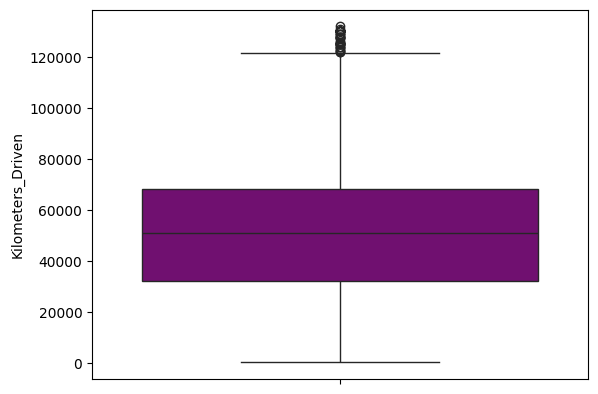

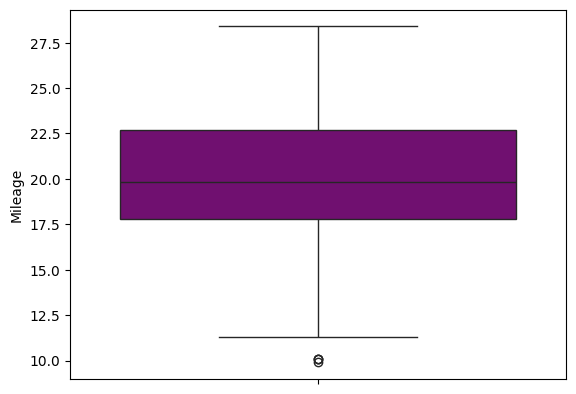

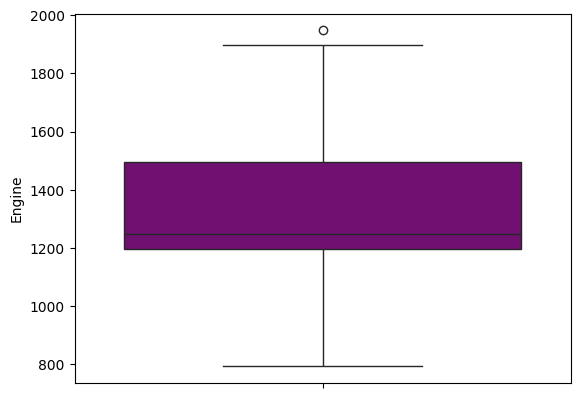

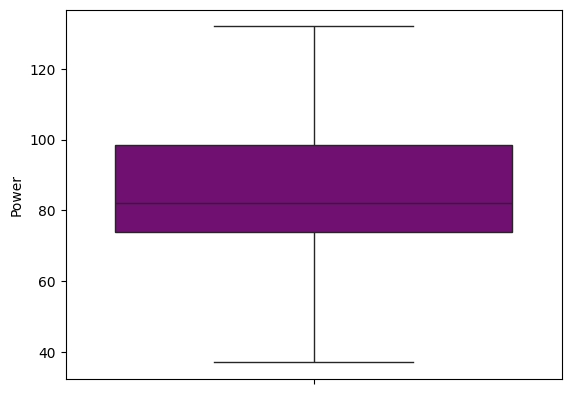

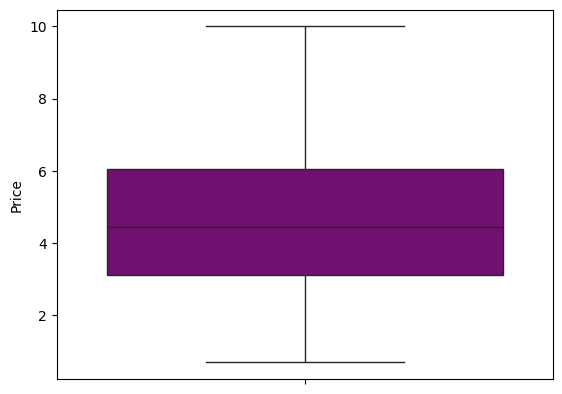

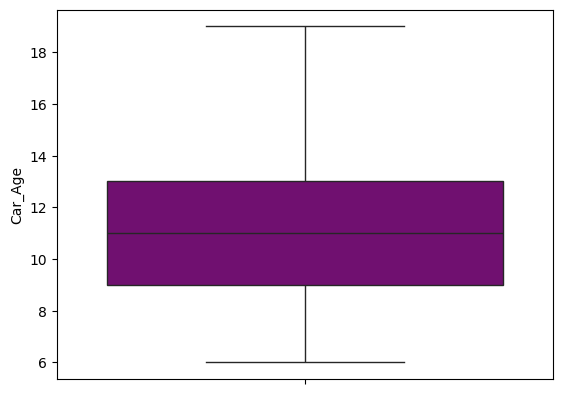

In [93]:
for col in num_col_lux:
    sns.boxplot(budget_df[col],color="Purple")
    plt.show()

# Analysis
Luxury cars’ numerical attributes (Price, Engine, Power) show extreme values.

Prices span very high ranges, Engines and Power are significantly larger than budget cars.

Insight: Luxury cars cannot be modeled together with budget cars; distributions differ too much.

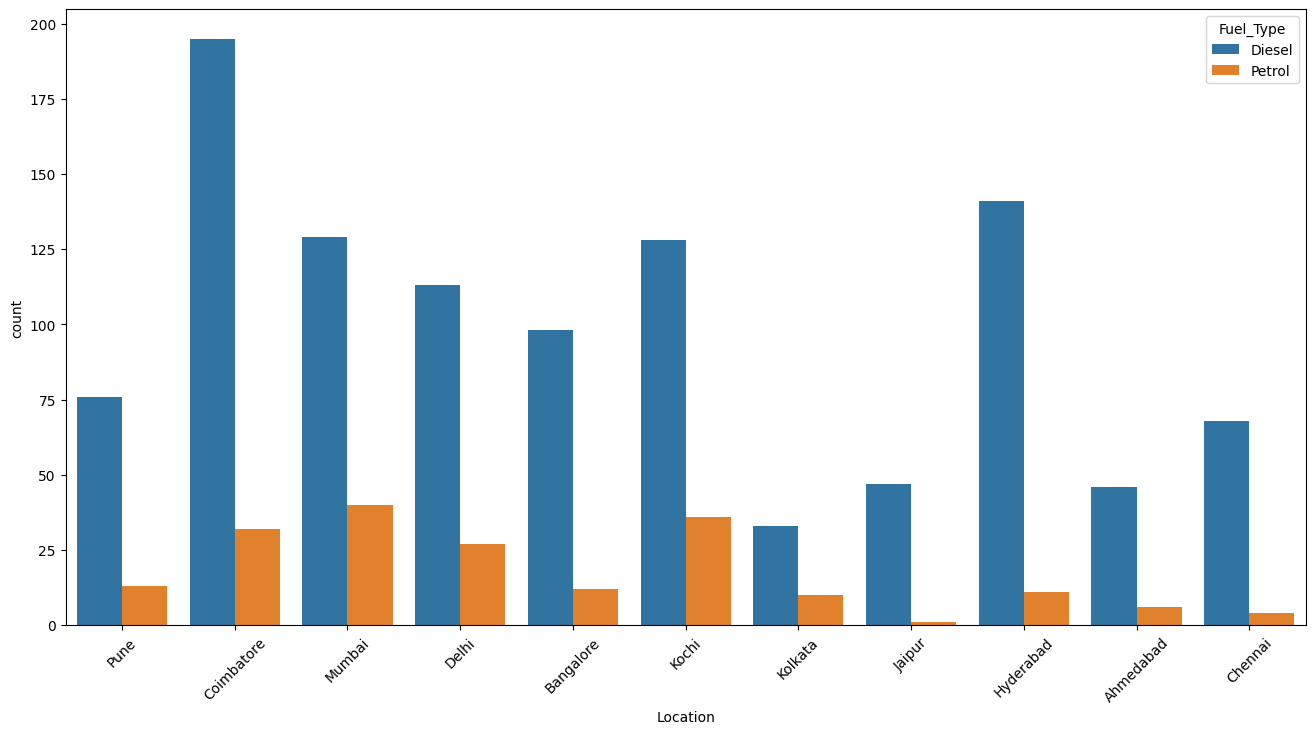

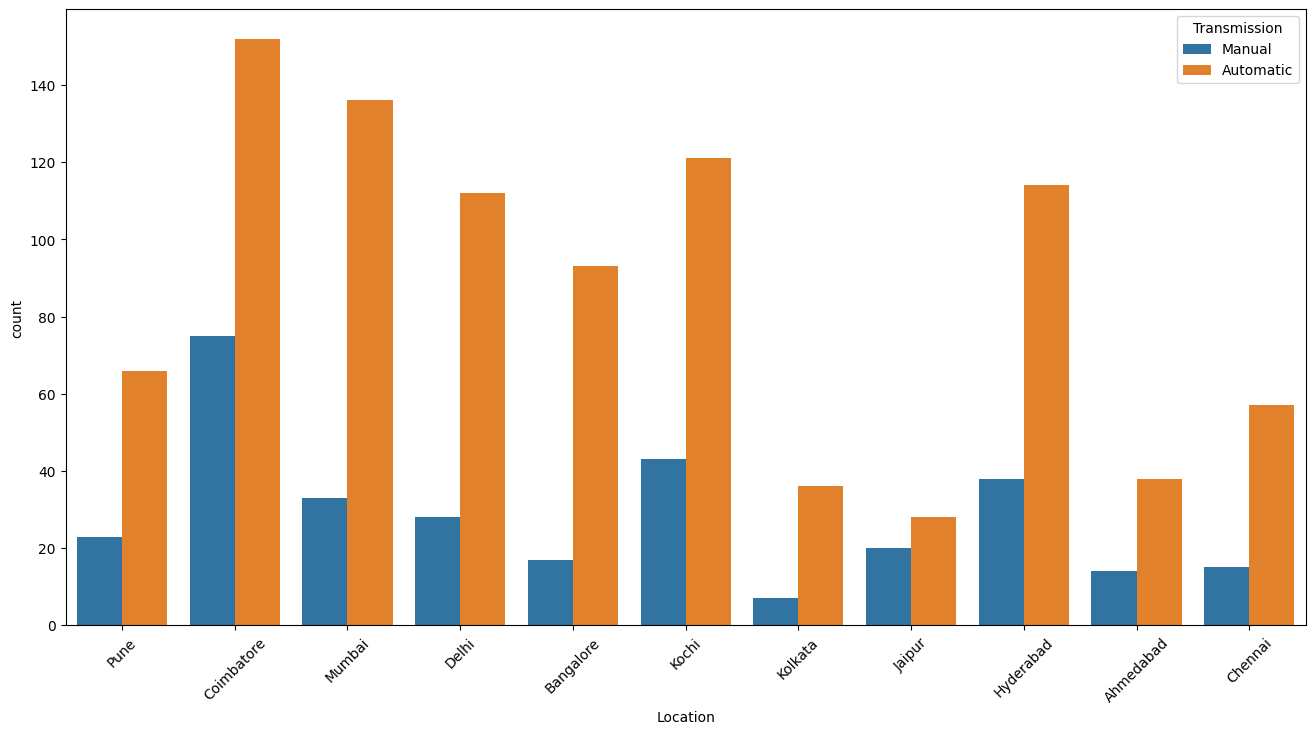

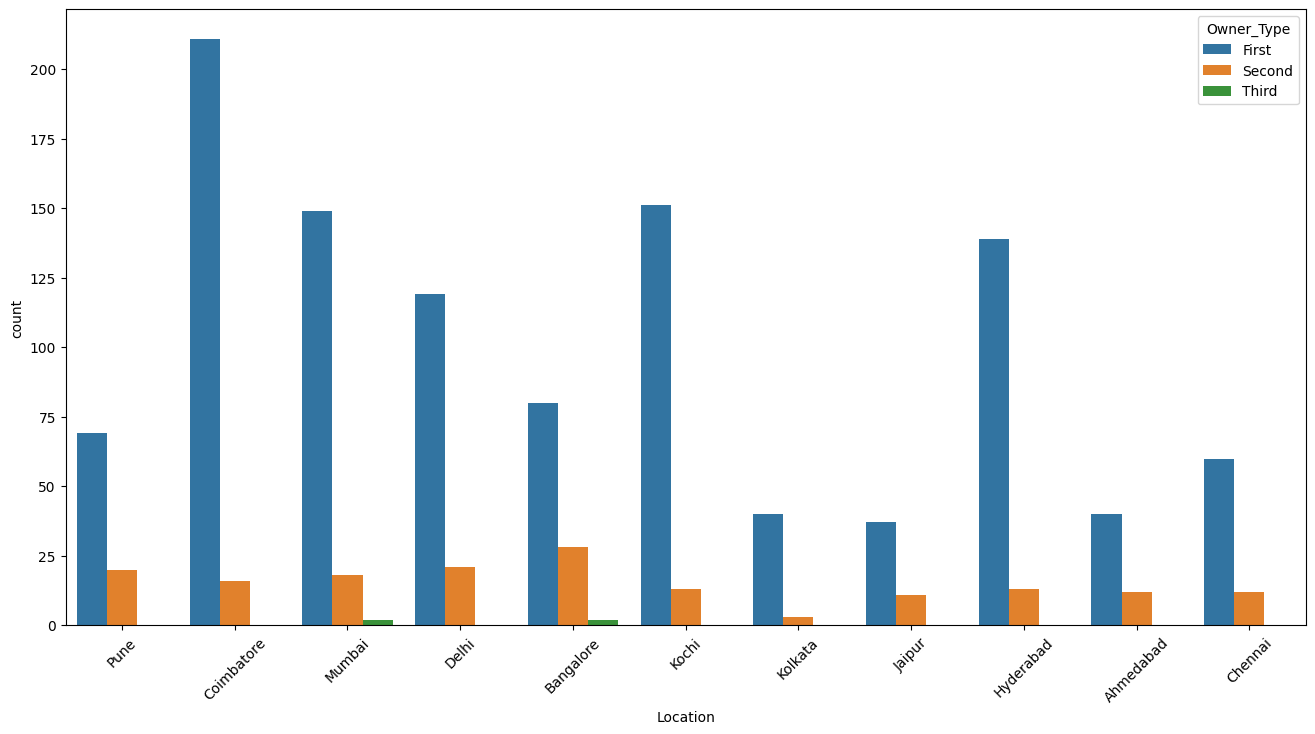

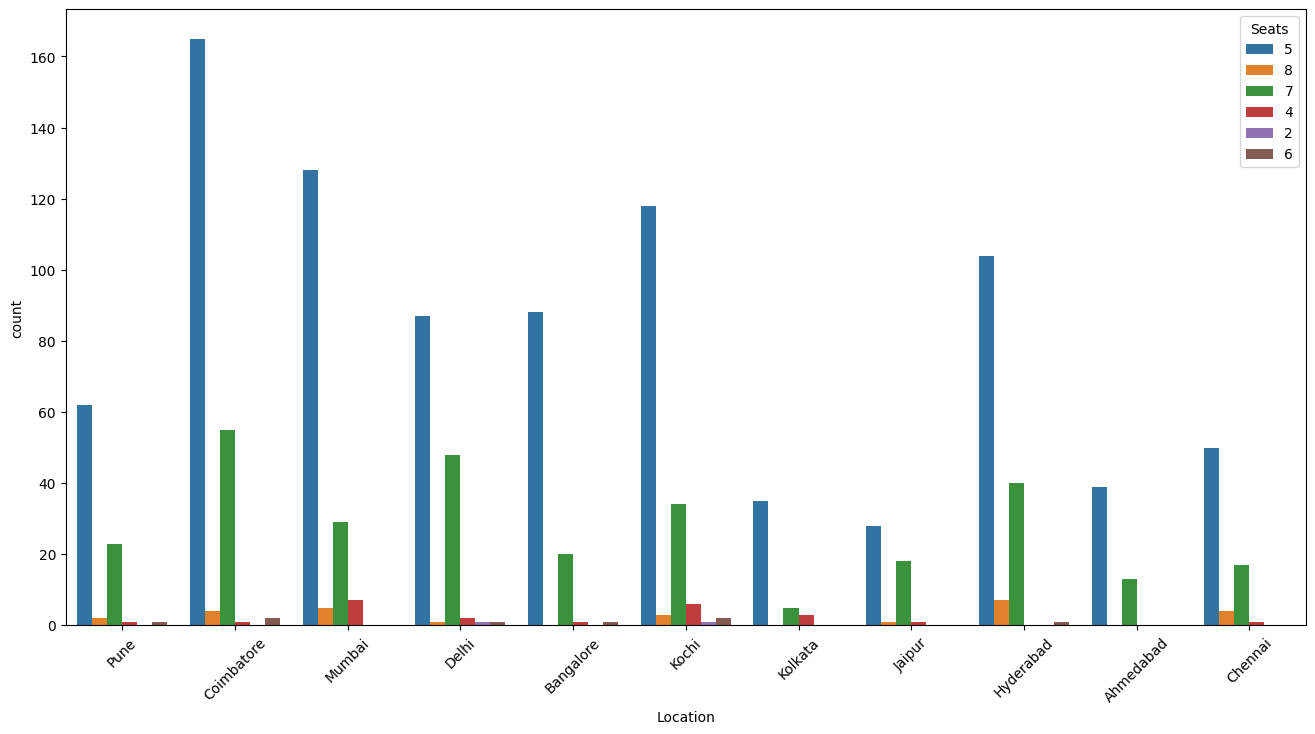

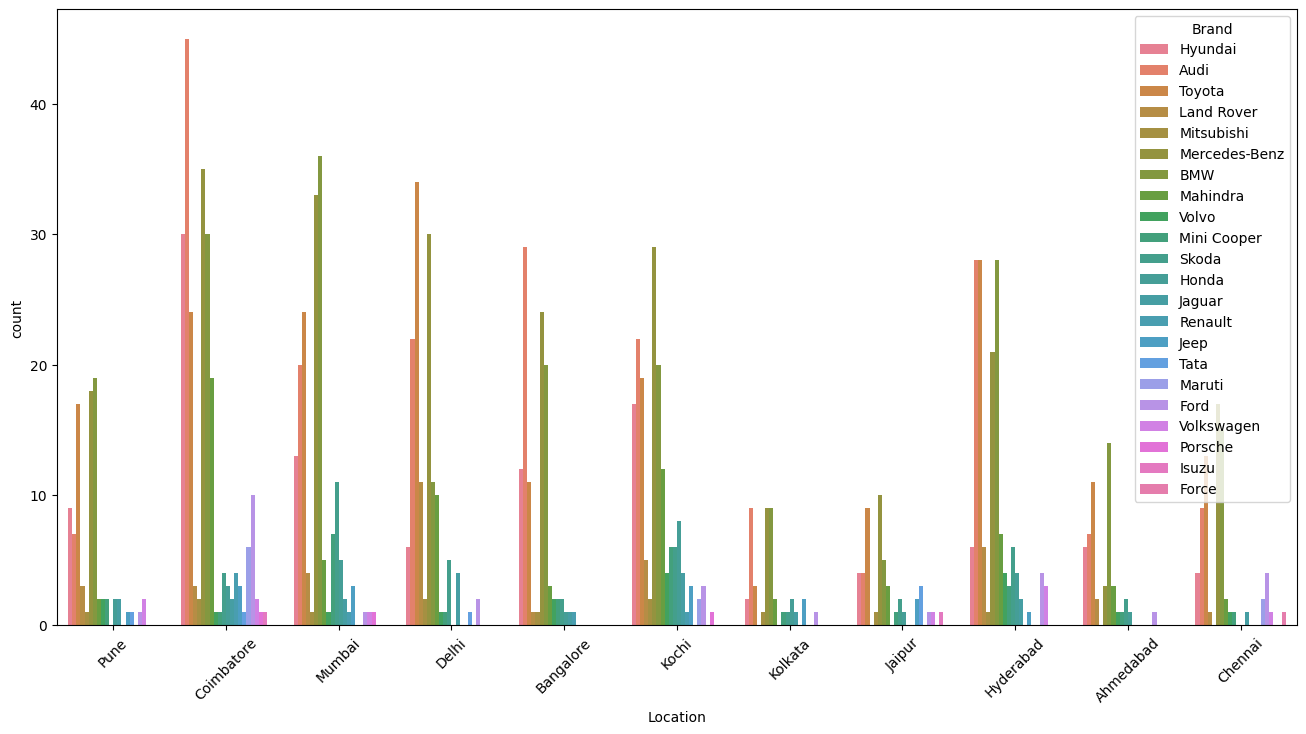

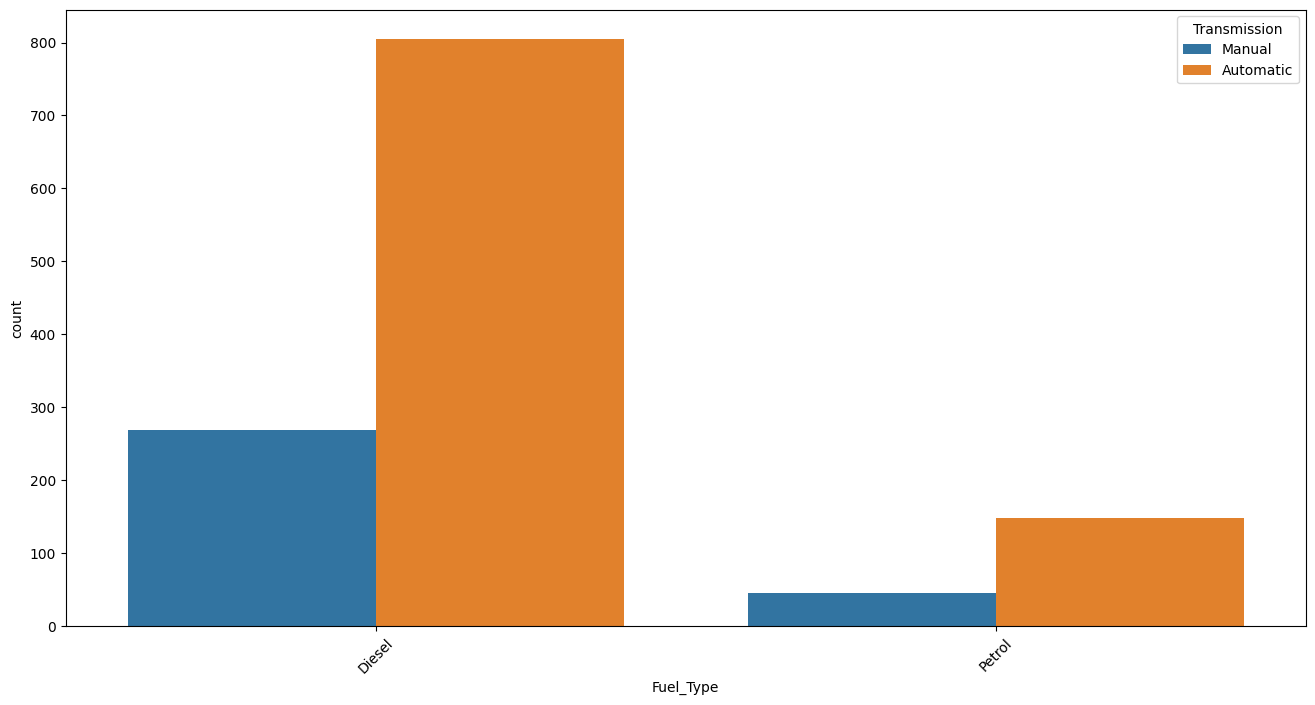

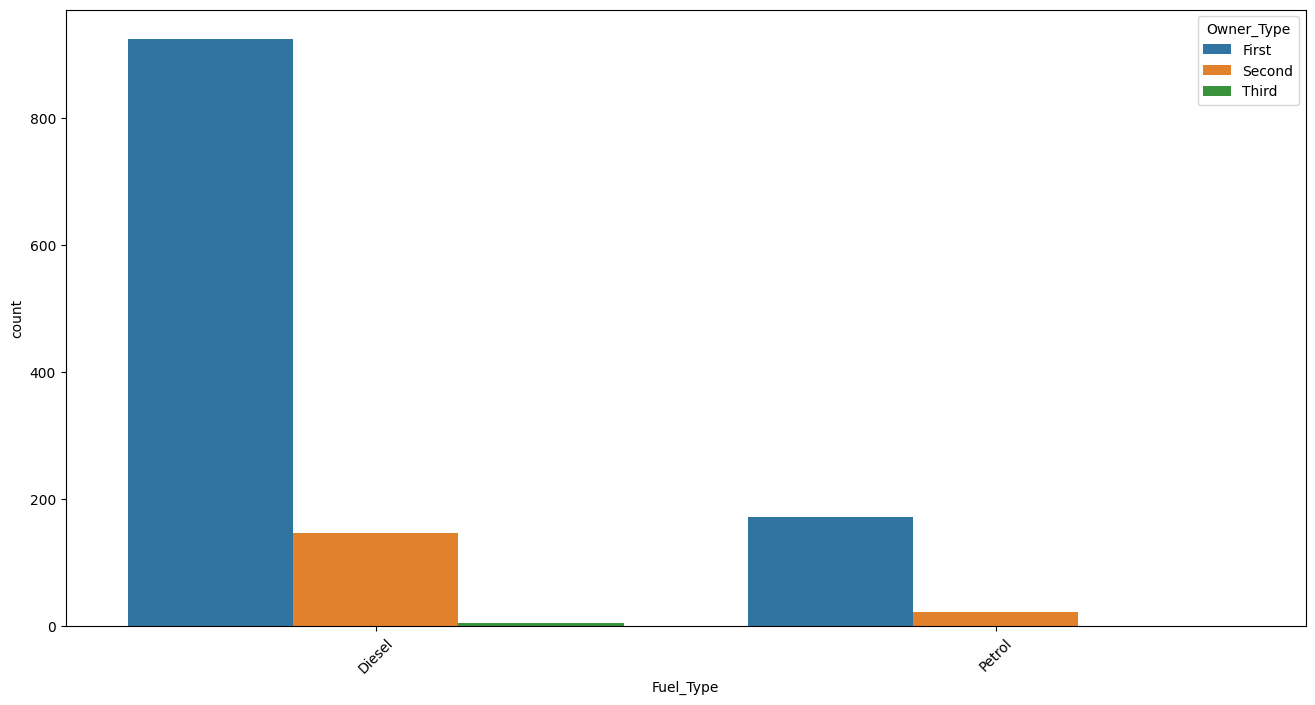

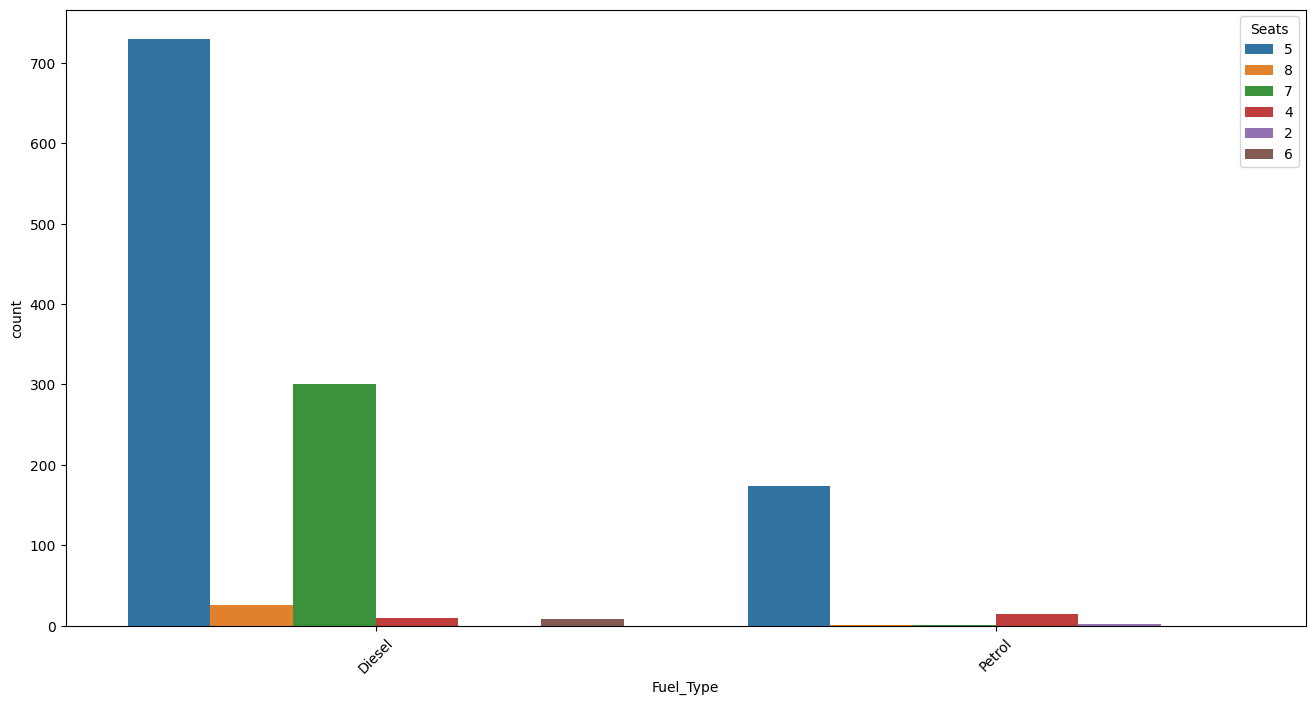

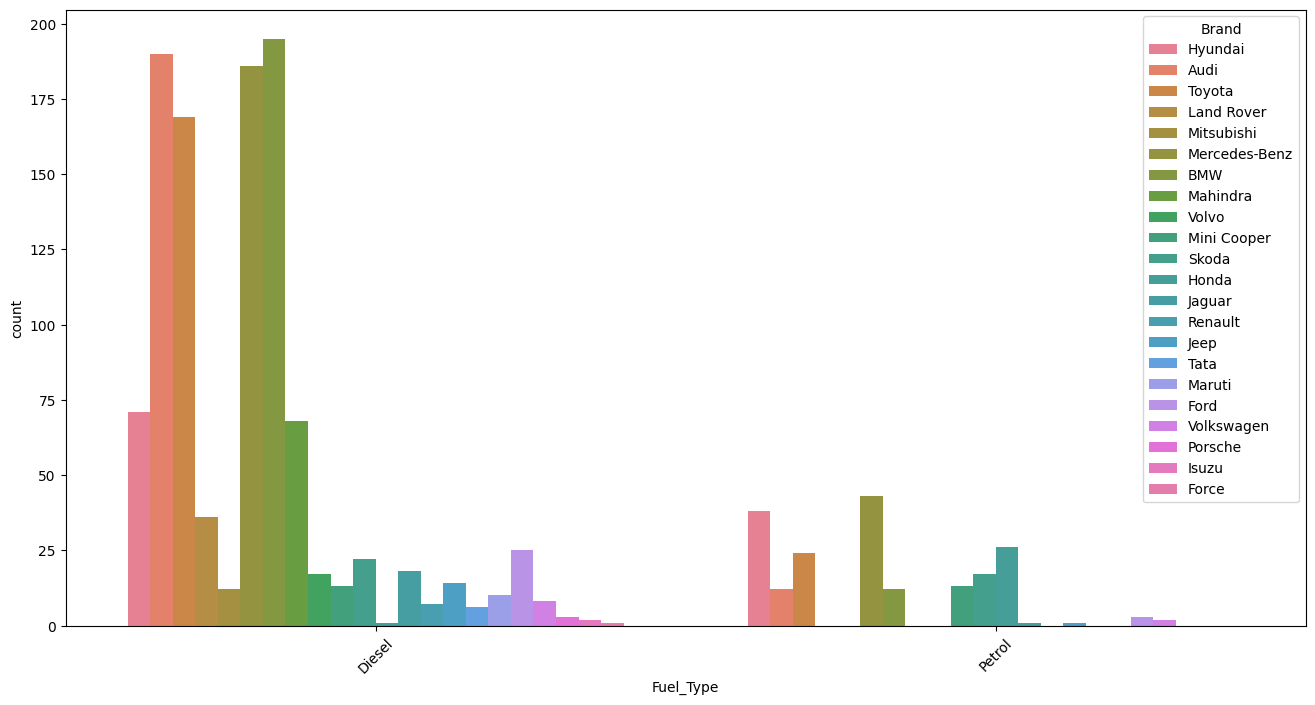

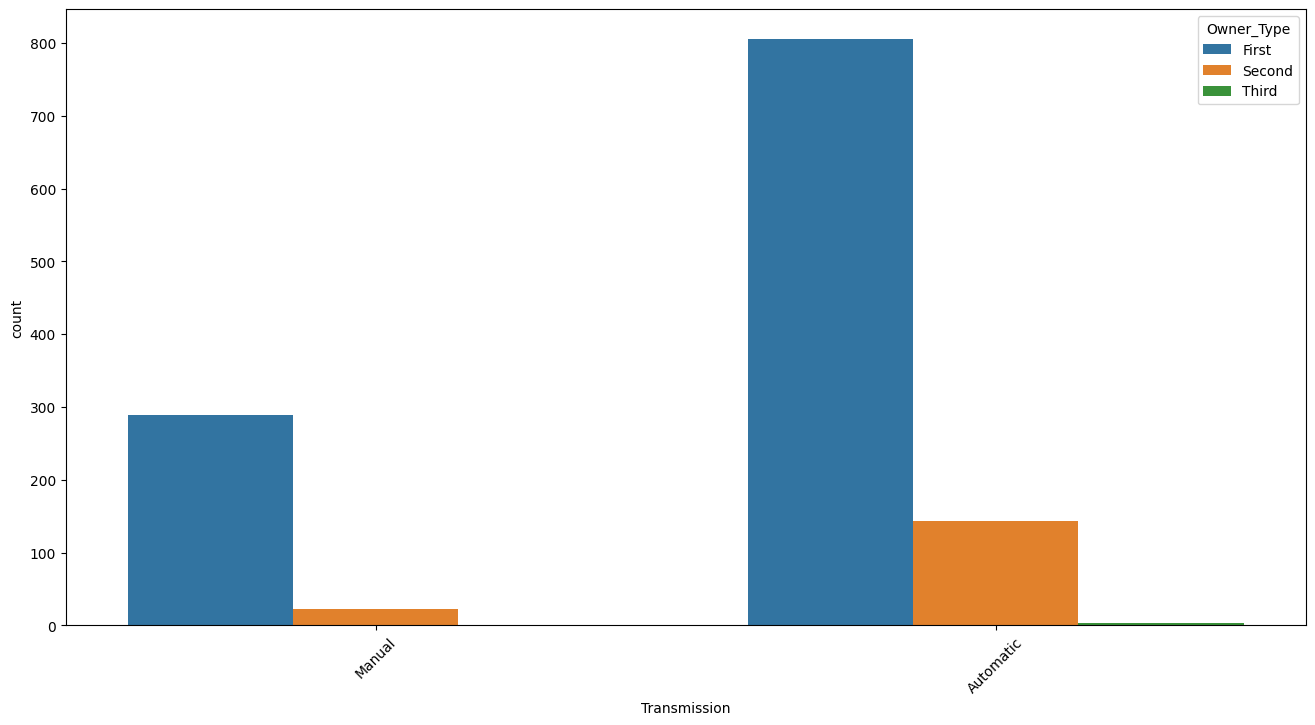

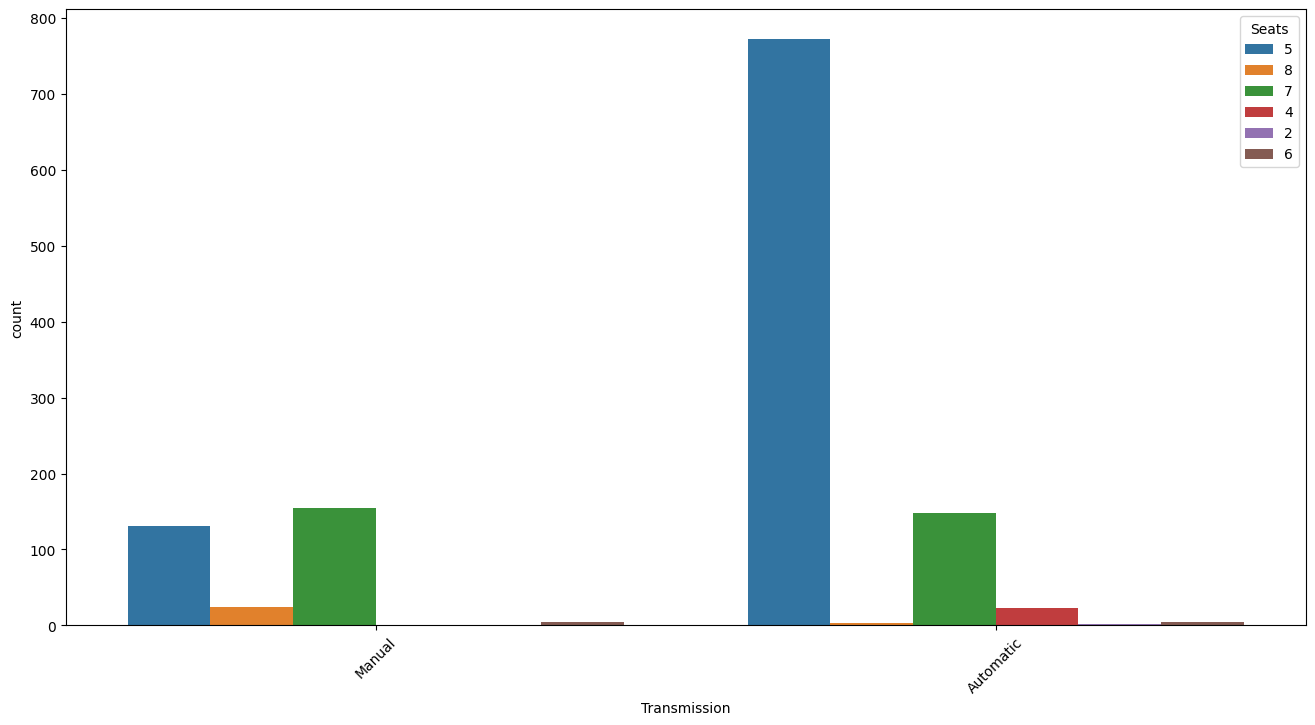

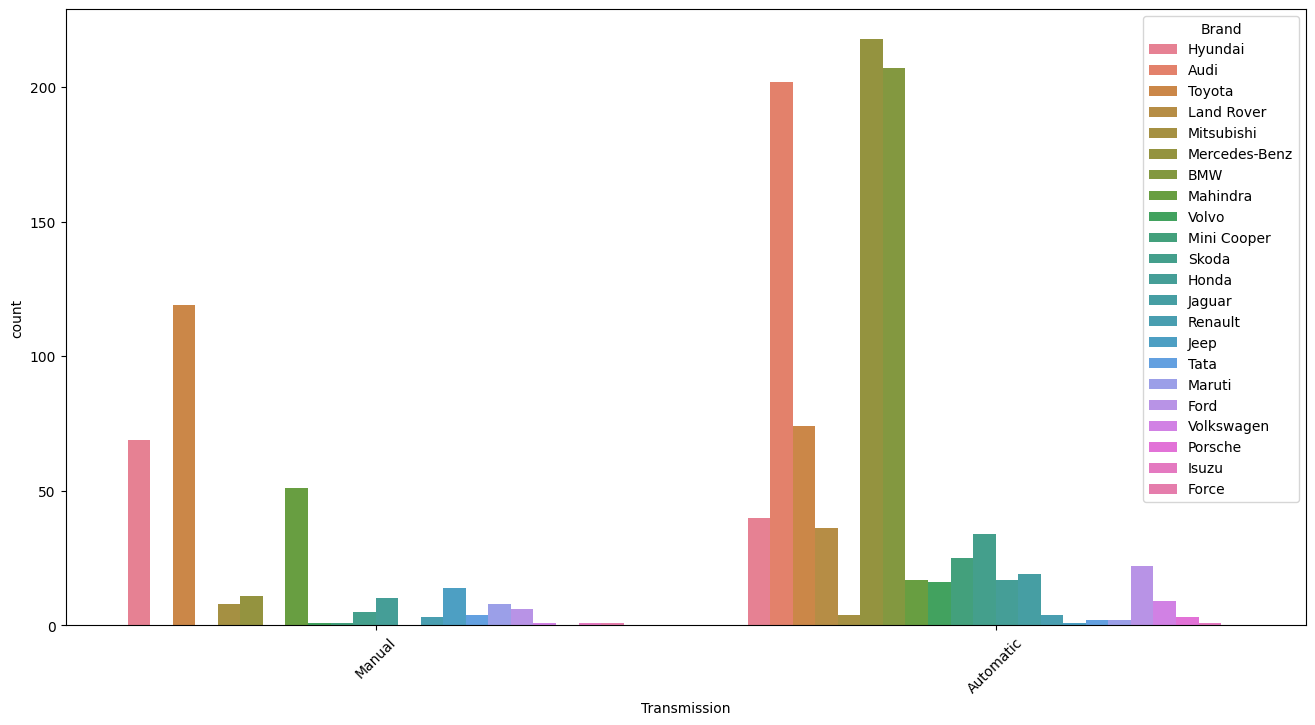

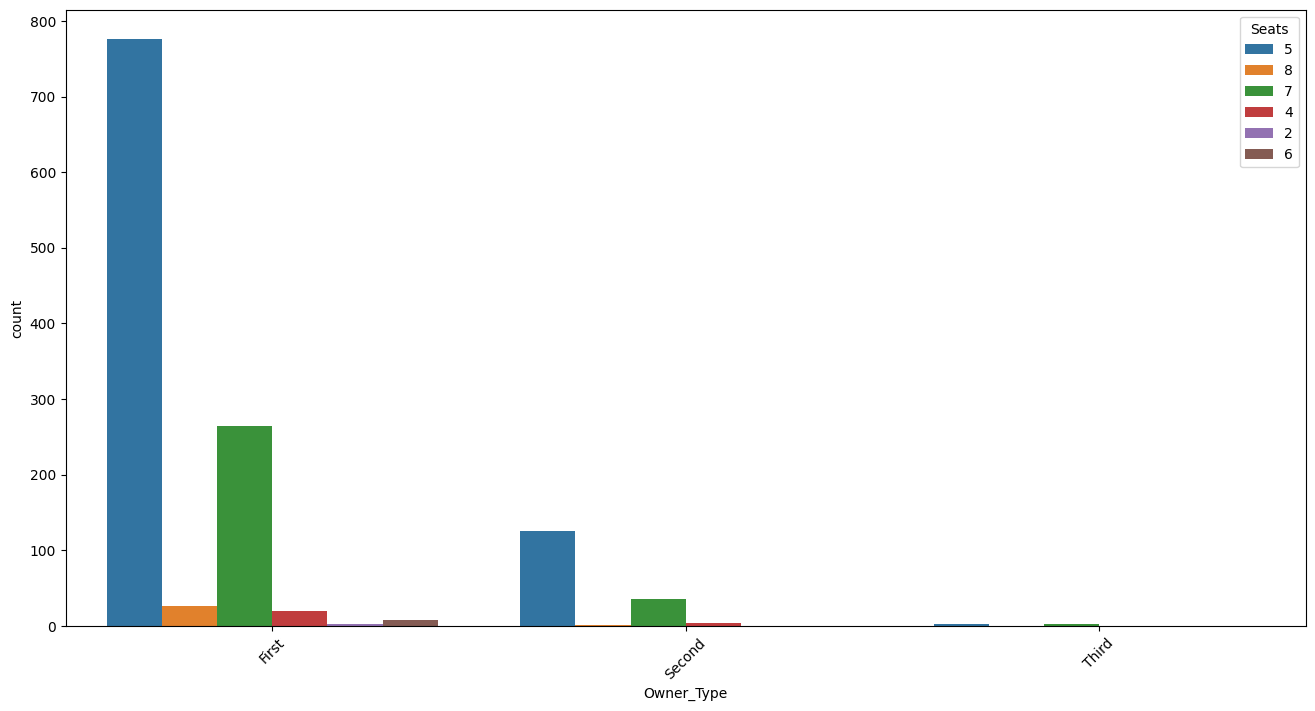

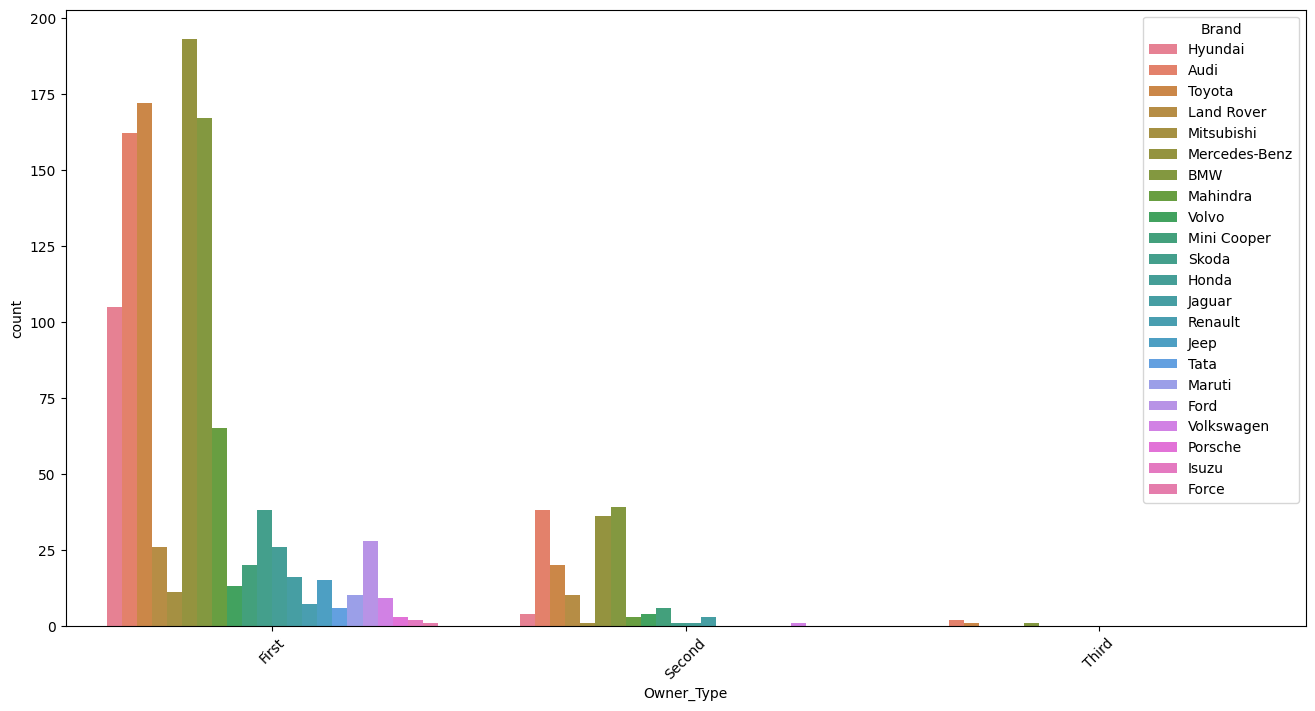

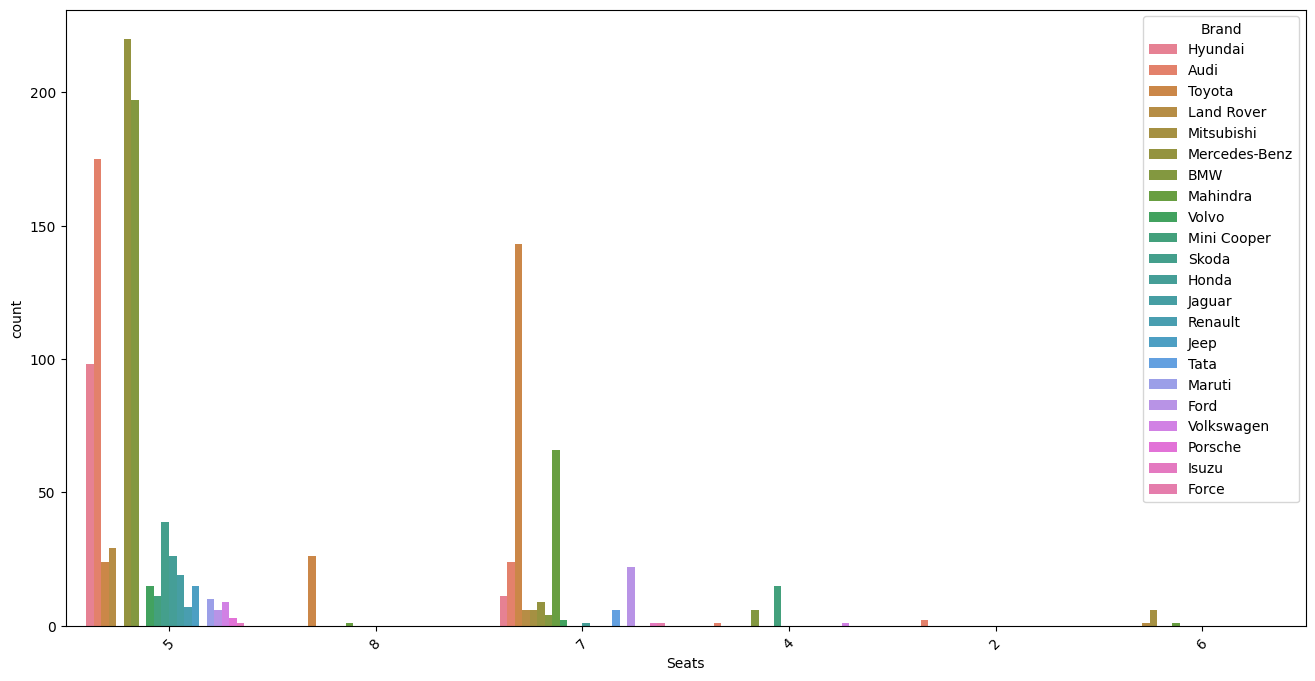

In [94]:
list1=[]
count=0
for col1 in cat_col_lux:
    for col2 in cat_col_lux:
        if col1==col2 or (col1,col2) in list1 or (col2,col1) in list1:
            continue
        else:
            plt.figure(figsize=(16,8))
            sns.countplot(data=luxury_df,x=luxury_df[col1],hue=luxury_df[col2])
            list1.append((col1,col2))
            plt.xticks(rotation=45)
            plt.show()
            count+=1

# Analysis
Interactions among categorical features in luxury cars.

Automatic + Petrol combinations dominate, Diesel is rare.

Insight: Shows how luxury customers strongly prefer performance and convenience over efficiency.

In [95]:
count,list1

(15,
 [('Location', 'Fuel_Type'),
  ('Location', 'Transmission'),
  ('Location', 'Owner_Type'),
  ('Location', 'Seats'),
  ('Location', 'Brand'),
  ('Fuel_Type', 'Transmission'),
  ('Fuel_Type', 'Owner_Type'),
  ('Fuel_Type', 'Seats'),
  ('Fuel_Type', 'Brand'),
  ('Transmission', 'Owner_Type'),
  ('Transmission', 'Seats'),
  ('Transmission', 'Brand'),
  ('Owner_Type', 'Seats'),
  ('Owner_Type', 'Brand'),
  ('Seats', 'Brand')])

# Multivariate Analysis

In [98]:
numeric_df=budget_df.select_dtypes(include=['number'])
numeric_df.reset_index(drop=True,inplace=True)
numeric_df

,Kilometers_Driven,Mileage,Engine,Power,Price,Car_Age
0,72000,19.950,998,58.16,1.75,15
1,46000,18.200,1199,88.70,4.50,14
2,87000,20.770,1248,88.76,6.00,13
3,75000,15.825,814,55.20,2.35,13
4,86999,23.080,1461,63.10,3.50,12
...,...,...,...,...,...,...
3625,70602,25.800,1498,98.60,4.83,10
3626,27365,28.400,1248,74.00,4.75,11
3627,100000,24.400,1120,71.00,4.00,10
3628,46000,18.900,998,67.10,2.65,12


In [99]:
numeric_df.corr().round(2)

,Kilometers_Driven,Mileage,Engine,Power,Price,Car_Age
Kilometers_Driven,1.00,-0.01,0.23,0.06,-0.29,0.49
Mileage,-0.01,1.00,-0.23,-0.27,0.21,-0.37
Engine,0.23,-0.23,1.00,0.82,0.33,0.13
Power,0.06,-0.27,0.82,1.00,0.46,-0.00
Price,-0.29,0.21,0.33,0.46,1.00,-0.68
Car_Age,0.49,-0.37,0.13,-0.00,-0.68,1.00


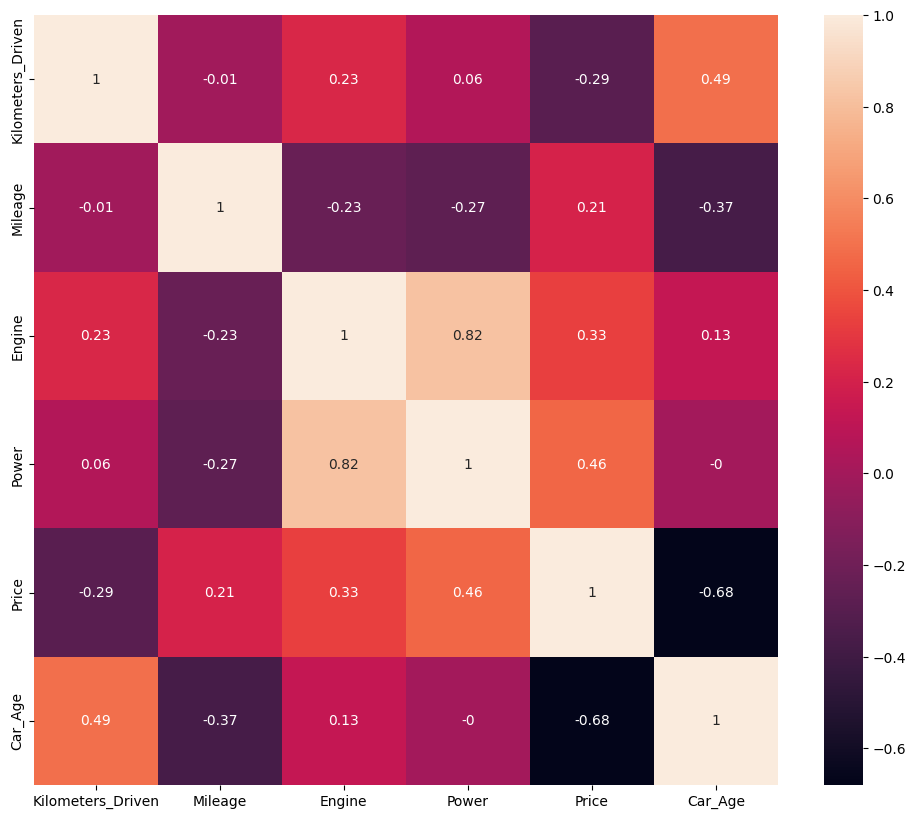

In [100]:
plt.figure(figsize=(12,10))
sns.heatmap(numeric_df.corr().round(2),annot=True)
plt.show()

# Analysis
Displays correlations between numerical variables.

Engine and Power → highly correlated.

Price positively correlated with Engine & Power, slightly negative with Mileage.

Kilometers Driven shows weak relation with Price.

Insight: Confirms earlier visual trends. Suggests feature reduction: keep either Engine or Power, but not both.